In [1]:
import json
import pandas as pd
import os
from vega import VegaLite

pd.set_option('display.max_rows', 50)

benchmark_dir = "../benchmarks"

def load_input_table(fname):
    with open(os.path.join(benchmark_dir, fname), "r") as f:
        benchmark = json.load(f)
        input_data = benchmark["input_data"]
        df = pd.DataFrame.from_records(input_data)
        return df

def wrap_vl_json(spec, df):
    data = df.to_json(orient='records')
    spec["data"] = {"values": json.loads(data)}
    return spec

Actual Profits  Number of Units   Quarter
0            3358               23  Quarter1
1            3829               27  Quarter2
2            2374               15  Quarter3
3            3373               43  Quarter4

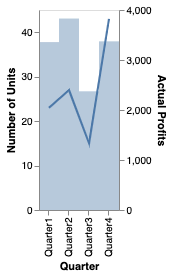

In [2]:
df1 = load_input_table("001.json")

display(df1)

chart = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"type": "line"},
            "encoding": {
                "y": {"field": "Number of Units", "type": "quantitative"},
                "x": { "field": "Quarter", "type": "nominal" }
            }
        }, 
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "encoding": {
                "y": {"type": "quantitative", "field": "Actual Profits"},
                "x": { "field": "Quarter", "type": "nominal" }
            }
        }
  ],
  "resolve": {"scale": {"y": "independent"}}
}

VegaLite(chart, df1)

East  High (>80%)  Low (<50%}  Medium (50%-80%}   Month  West
0   86.4           20          50                30  Apr-15  63.0
1   45.8           20          50                30  May-15  58.9
2   44.1           20          50                30  Jun-15  81.6
3   77.6           20          50                30  Jul-15  86.1
4   80.7           20          50                30  Aug-15  95.0
..   ...          ...         ...               ...     ...   ...
7   76.0           20          50                30  Nov-15  88.3
8   79.0           20          50                30  Dec-15  75.5
9   77.0           20          50                30  Jan-16  72.1
10  67.1           20          50                30  Feb-16  93.1
11  45.8           20          50                30  Mar-16  95.7

[12 rows x 6 columns]

Month    variable  value
0   Apr-15  Low (<50%}   50.0
1   May-15  Low (<50%}   50.0
2   Jun-15  Low (<50%}   50.0
3   Jul-15  Low (<50%}   50.0
4   Aug-15  Low (<50%}   50.0
..     ...         ...    ...
55  Nov-15        West   88.3
56  Dec-15        West   75.5
57  Jan-16        West   72.1
58  Feb-16        West   93.1
59  Mar-16        West   95.7

[60 rows x 3 columns]

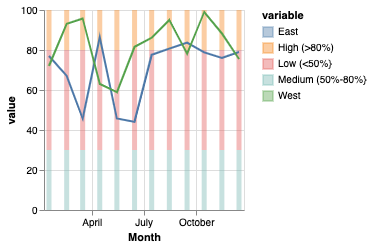

In [3]:
df2 = load_input_table("002.json")

display(df2)

df2 = pd.melt(df2, id_vars='Month', 
              value_vars=["Low (<50%}", "Medium (50%-80%}", "High (>80%)", "East", "West"])

display(df2)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "transform": [{"filter": "datum.variable != \"East\" && datum.variable != \"West\""}],
            "encoding": {
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Month", "type": "temporal" }
            }
        }, 
        {
            "mark": {"type": "line", "stroke": "red"},
            "transform": [{"filter": "datum.variable == \"East\" || datum.variable == \"West\""}],
            "encoding": {
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Month", "type": "temporal" }
            }
        }
  ]
}

#print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df2)

Month  Net Cash Flow
0   Start          80000
1     Apr          -5003
2     May         -16700
3     Jun          48802
4     Jul         -11198
..    ...            ...
8     Nov          43250
9     Dec         -18280
10    Jan          26670
11    Feb          15000
12    Mar          24750

[13 rows x 2 columns]

Month  Net Cash Flow
0   Start          80000
1     Apr          -5003
2     May         -16700
3     Jun          48802
4     Jul         -11198
..    ...            ...
8     Nov          43250
9     Dec         -18280
10    Jan          26670
11    Feb          15000
12    Mar          24750

[13 rows x 2 columns]

Month  Net Cash Flow  Net Cash Flow Sum
0   Start          80000              80000
1     Apr          -5003              74997
2     May         -16700              58297
3     Jun          48802             107099
4     Jul         -11198              95901
..    ...            ...                ...
8     Nov          43250              98271
9     Dec         -18280              79991
10    Jan          26670             106661
11    Feb          15000             121661
12    Mar          24750             146411

[13 rows x 3 columns]

Month  Net Cash Flow  Net Cash Flow Sum       c
0   Start          80000              80000       0
1     Apr          -5003              74997   80000
2     May         -16700              58297   74997
3     Jun          48802             107099   58297
4     Jul         -11198              95901  107099
..    ...            ...                ...     ...
8     Nov          43250              98271   55021
9     Dec         -18280              79991   98271
10    Jan          26670             106661   79991
11    Feb          15000             121661  106661
12    Mar          24750             146411  121661

[13 rows x 4 columns]

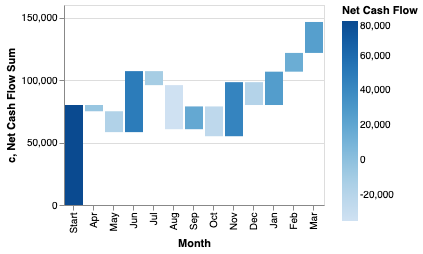

In [4]:
df3 = load_input_table("003.json")

display(df3)

df3_1 = df3["Net Cash Flow"].cumsum()

display(df3)

df3 = df3.join(df3_1, lsuffix='', rsuffix=' Sum')

display(df3)

df3 = df3.assign(c=df3["Net Cash Flow Sum"]-df3["Net Cash Flow"])

display(df3)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": {"field": "Month", "type": "nominal", "sort": "none"},
        "y2": {
          "field": "Net Cash Flow Sum",
          "type": "quantitative"    
        },
        "y": {"field": "c", "type": "quantitative"},
        "color": {"field": "Net Cash Flow", "type": "quantitative"}
    }
}

VegaLite(vl_spec, df3)

Age Group  Female-1986  Female-2050  Male-1986  Male-2050
0      00-04         8243         5637       8580       5901
1      05-09         8440         5804       8763       6070
2      10-14         8659         5986       8959       6255
3      15-19         8588         6213       8836       6479
4      20-24         7930         6455       8096       6704
..       ...          ...          ...        ...        ...
12     60-64         2207         7870       1862       7315
13     65-69         1783         7607       1384       6712
14     70-74         1330         6844        942       5621
15     75-79          864         5623        547       4176
16     80-00          763         8575        382       4876

[17 rows x 5 columns]

Age Group     variable  value
0      00-04  Female-1986   8243
1      05-09  Female-1986   8440
2      10-14  Female-1986   8659
3      15-19  Female-1986   8588
4      20-24  Female-1986   7930
..       ...          ...    ...
63     60-64    Male-2050   7315
64     65-69    Male-2050   6712
65     70-74    Male-2050   5621
66     75-79    Male-2050   4176
67     80-00    Male-2050   4876

[68 rows x 3 columns]

Age Group     variable  value  gender  year
0      00-04  Female-1986   8243  Female  1986
1      05-09  Female-1986   8440  Female  1986
2      10-14  Female-1986   8659  Female  1986
3      15-19  Female-1986   8588  Female  1986
4      20-24  Female-1986   7930  Female  1986
..       ...          ...    ...     ...   ...
63     60-64    Male-2050   7315    Male  2050
64     65-69    Male-2050   6712    Male  2050
65     70-74    Male-2050   5621    Male  2050
66     75-79    Male-2050   4176    Male  2050
67     80-00    Male-2050   4876    Male  2050

[68 rows x 5 columns]

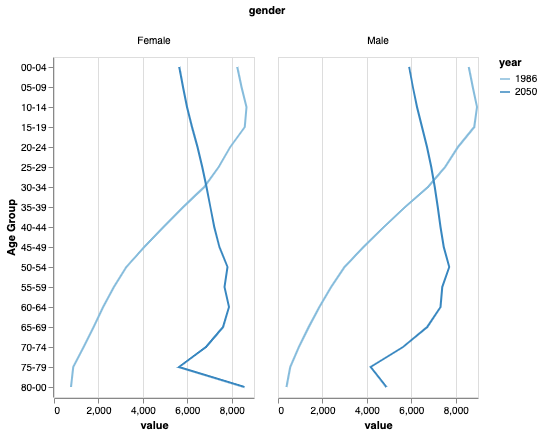

In [5]:
df4 = load_input_table("004.json")

display(df4)

df4 = pd.melt(df4, id_vars='Age Group', 
              value_vars=["Female-1986", "Female-2050", "Male-1986", "Male-2050"])

display(df4)

split_col = df4["variable"].str.split("-", expand=True)
df4["gender"] = split_col[0]
df4["year"] = split_col[1]

display(df4)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "y": {"field": "Age Group", "type": "nominal", "sort": None},
        "x": {
          "field": "value",
          "type": "quantitative"    
        },
        "column": {"field": "gender", "type": "nominal"},
        "color": {"field": "year","type": "ordinal"}
    }
}

VegaLite(vl_spec, df4)

Cost Month  Profit    ROI  Sales
0     6   Jan       4  66.67     10
1    15   Feb       5  33.33     20
2    24   Mar       6  25.00     30
3    33   Apr       7  21.21     40
4    42   May       8  19.05     50
5    51   Jun       9  17.65     60

Month variable  value
0    Jan     Cost    6.0
1    Feb     Cost   15.0
2    Mar     Cost   24.0
3    Apr     Cost   33.0
4    May     Cost   42.0
..   ...      ...    ...
19   Feb    Sales   20.0
20   Mar    Sales   30.0
21   Apr    Sales   40.0
22   May    Sales   50.0
23   Jun    Sales   60.0

[24 rows x 3 columns]

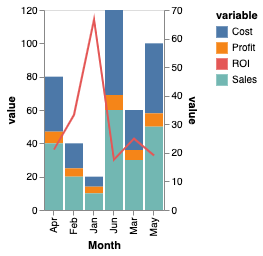

In [6]:
df5 = load_input_table("005.json")

display(df5)

df5 = pd.melt(df5, id_vars='Month', value_vars=["Cost", "Profit", "ROI", "Sales"])

display(df5)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"type": "bar"},
            "transform": [{"filter": "datum.variable != \"ROI\""}],
            "encoding": {
                "x": { "field": "Month", "type": "nominal" },
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"}
            }
        },
        {
            "mark": {"type": "line", "stroke": "red"},
            "transform": [{"filter": "datum.variable == \"ROI\""}],
            "encoding": {
                "x": { "field": "Month", "type": "nominal" },
                "color": {"field": "variable", "type": "nominal"},
                "y": {"field": "value", "type": "quantitative"}
            }
        }
  ],
  "resolve": {"scale": {"y": "independent"}}
}

VegaLite(vl_spec, df5)

Actual    Bucket  Budgeted
0     115  Bucket E       100
1      90  Bucket D       100
2     115  Bucket C       125
3     140  Bucket B       125
4     150  Bucket A       140

Bucket  variable  value
0  Bucket E    Actual    115
1  Bucket D    Actual     90
2  Bucket C    Actual    115
3  Bucket B    Actual    140
4  Bucket A    Actual    150
5  Bucket E  Budgeted    100
6  Bucket D  Budgeted    100
7  Bucket C  Budgeted    125
8  Bucket B  Budgeted    125
9  Bucket A  Budgeted    140

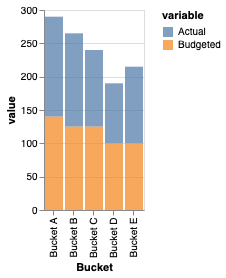

In [7]:
df6 = load_input_table("006.json")

display(df6)

df6 = pd.melt(df6, id_vars='Bucket', value_vars=["Actual", "Budgeted"])

display(df6)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar", "opacity":0.7},
    "encoding": {
        "color": {"field": "variable", "type": "nominal"},
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "Bucket", "type": "nominal" },
    }
}

VegaLite(vl_spec, df6)

Agree  Disagree  Strongly Agree  Strongly Disagree  index
0     35       8.0              50                  7      0
1     10      10.0              70                 10      1
2     30      15.0              45                 10      2

id           variable  value
0    0  Strongly Disagree    7.0
1    1  Strongly Disagree   10.0
2    2  Strongly Disagree   10.0
3    0              Agree   35.0
4    1              Agree   10.0
..  ..                ...    ...
7    1           Disagree   10.0
8    2           Disagree   15.0
9    0     Strongly Agree   50.0
10   1     Strongly Agree   70.0
11   2     Strongly Agree   45.0

[12 rows x 3 columns]

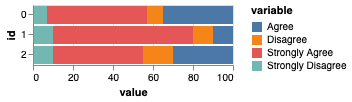

In [8]:
df7 = load_input_table("007.json")

display(df7)


df7['id'] = df7.index
df7 = pd.melt(df7, id_vars='id', 
              value_vars=["Strongly Disagree", "Agree", "Disagree", "Strongly Agree"])

display(df7)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar"},
    "encoding": {
        "color": {"field": "variable", "type": "nominal"},
        "y": {"field": "id", "type": "nominal"},
        "x": { "field": "value", "type": "quantitative"}    
    }
}

VegaLite(vl_spec, df7)

Value      Y1      Y2      Y3      Y4      Y5
0        means  0.5200  0.5700  0.6000  0.6300  0.6300
1       stddev  0.1328  0.1321  0.1303  0.1266  0.1225
2  upper range  0.6600  0.7000  0.7300  0.7500  0.7500
3  lower range  0.3900  0.4400  0.4700  0.5000  0.5100

Value variable   value
0         means       Y1  0.5200
1        stddev       Y1  0.1328
2   upper range       Y1  0.6600
3   lower range       Y1  0.3900
4         means       Y2  0.5700
..          ...      ...     ...
15  lower range       Y4  0.5000
16        means       Y5  0.6300
17       stddev       Y5  0.1225
18  upper range       Y5  0.7500
19  lower range       Y5  0.5100

[20 rows x 3 columns]

Value variable  lower range  means  stddev  upper range
0           Y1         0.39   0.52  0.1328         0.66
1           Y2         0.44   0.57  0.1321         0.70
2           Y3         0.47   0.60  0.1303         0.73
3           Y4         0.50   0.63  0.1266         0.75
4           Y5         0.51   0.63  0.1225         0.75

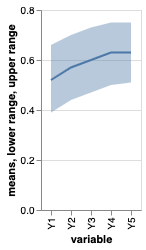

In [9]:
df8 = load_input_table("008.json")

display(df8)

df8 = pd.melt(df8, id_vars='Value', value_vars=["Y1", "Y2", "Y3", "Y4", "Y5"])

display(df8)

df8 = df8.pivot(index='variable',columns='Value', values='value').reset_index()

display(df8)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": "line",
            "encoding": {
                "x": { "field": "variable", "type": "nominal" },
                "y": {"field": "means", "type": "quantitative"}
            }
        }, 
        {
            "mark": {"opacity": 0.4, "type": "area"},
            "encoding": {
                "x": { "field": "variable", "type": "nominal" },
                "y": {"type": "quantitative", "field": "lower range"},
                "y2": {"type": "quantitative", "field": "upper range"}
            }
        }
  ]
}

VegaLite(vl_spec, df8)

2009  2010  2011  2012  2013  2014       Location  \
0   13.3  13.7  13.4  13.1  12.9  10.4  United States   
1   18.1  18.2  17.7  17.3  17.1  13.6  United States   
2   29.2  29.2  27.6  27.4  26.9  23.1  United States   
3   14.8  15.7  15.4  15.0  14.6  10.6  United States   
4   17.3  17.4  18.5  18.0  17.9  13.5  United States   
..   ...   ...   ...   ...   ...   ...            ...   
22  14.5  13.1  31.4  16.1  29.9  14.6       Maricopa   
23  23.3  28.4  32.9  32.1  32.8  27.6       Maricopa   
24  25.3  14.1  18.7  14.3  15.3  13.9       Maricopa   
25  15.1  10.6  10.5  10.8  10.9   8.1       Maricopa   
26  11.0  29.9  30.6  30.6  30.3  23.9       Maricopa   

                                    Rae  
0                                 White  
1             Black or African American  
2      American Indian or Alaska Native  
3                                 Asian  
4   Native Hawaiian or Pacific Islander  
..                                  ...  
22  Native Hawaiian or Pacific Islander  
23                           Other Race  
24                    Two or more races  
25         White,not Hispanic or Latino  
26                   Hispanic or Latino  

[27 rows x 8 columns]

Location                                  Rae variable  value
0    United States                                White     2009   13.3
1    United States            Black or African American     2009   18.1
2    United States     American Indian or Alaska Native     2009   29.2
3    United States                                Asian     2009   14.8
4    United States  Native Hawaiian or Pacific Islander     2009   17.3
..             ...                                  ...      ...    ...
157       Maricopa  Native Hawaiian or Pacific Islander     2014   14.6
158       Maricopa                           Other Race     2014   27.6
159       Maricopa                    Two or more races     2014   13.9
160       Maricopa         White,not Hispanic or Latino     2014    8.1
161       Maricopa                   Hispanic or Latino     2014   23.9

[162 rows x 4 columns]

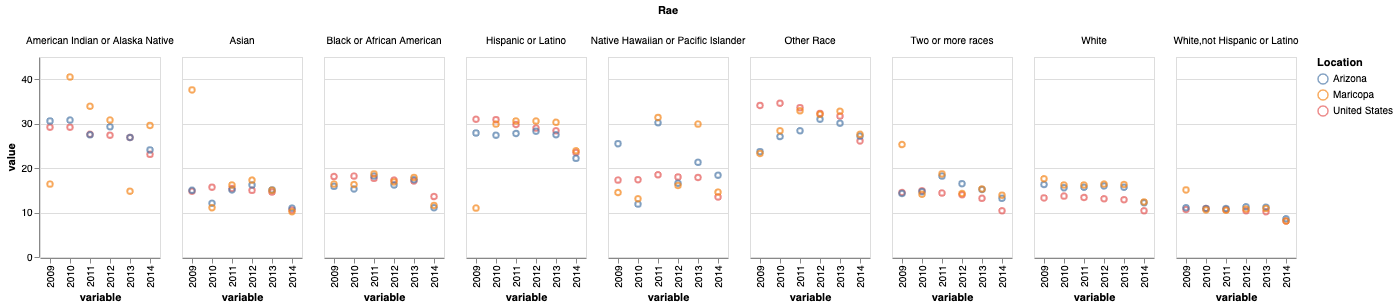

In [10]:
df9 = load_input_table("009.json")

display(df9)

df9 = pd.melt(df9, id_vars=['Location', 'Rae'], value_vars=["2009", "2010", "2011", "2012", "2013", "2014"])

display(df9)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "point",
    "encoding": {
        "x": { "field": "variable", "type": "nominal" },
        "y": {"field": "value", "type": "quantitative"},
        "color": {"field": "Location", "type": "nominal"},
        "column": {"field": "Rae", "type": "nominal"}
    }
}

VegaLite(vl_spec, df9)

Class  Fall  Spring
0  Literacy    34      69
1  Language    63      77
2      Math    67      75
3   Science    92      98
4      Arts    96     100

Class variable  value
0  Literacy     Fall     34
1  Language     Fall     63
2      Math     Fall     67
3   Science     Fall     92
4      Arts     Fall     96
5  Literacy   Spring     69
6  Language   Spring     77
7      Math   Spring     75
8   Science   Spring     98
9      Arts   Spring    100

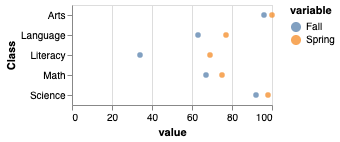

In [11]:
df10 = load_input_table("010.json")

display(df10)

df10 = pd.melt(df10, id_vars="Class", value_vars=['Fall', 'Spring'])

display(df10)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "circle",
    "encoding": {
        "y": {"field": "Class", "type": "nominal"},
        "x": { "field": "value", "type": "quantitative" },
        "color": {"field": "variable", "type": "nominal"}
    }

}

VegaLite(vl_spec, df10)

APAC  C1        C2  EMEA  LATAM  North_America
0     48  Q1  Targeted    66     48             56
1     47  Q1   Engaged    65     48             52
2     45  Q1   Pitched    59     44             45
3     38  Q1   Adopted    52     31             36
4     39  Q2  Targeted    56     43             50
..   ...  ..       ...   ...    ...            ...
7     27  Q2   Adopted    42     26             31
8     87  Q3  Targeted    91     95             70
9     75  Q3   Engaged    78     80             55
10    74  Q3   Pitched    72     73             50
11    59  Q3   Adopted    62     53             40

[12 rows x 6 columns]

C1        C2 variable  value
0   Q1  Targeted     EMEA     66
1   Q1   Engaged     EMEA     65
2   Q1   Pitched     EMEA     59
3   Q1   Adopted     EMEA     52
4   Q2  Targeted     EMEA     56
..  ..       ...      ...    ...
43  Q2   Adopted     APAC     27
44  Q3  Targeted     APAC     87
45  Q3   Engaged     APAC     75
46  Q3   Pitched     APAC     74
47  Q3   Adopted     APAC     59

[48 rows x 4 columns]

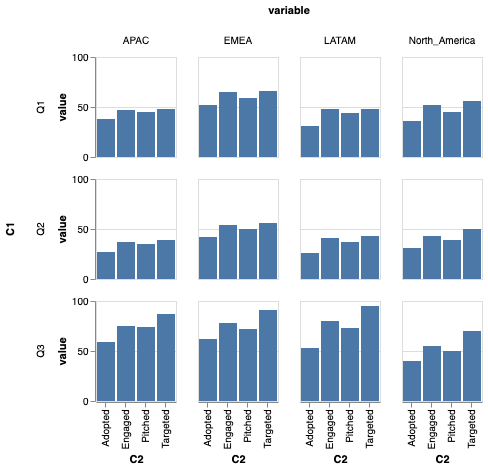

In [12]:
df11 = load_input_table("011.json")

display(df11)

df11 = pd.melt(df11, id_vars=["C1", "C2"], value_vars=["EMEA", "LATAM", "North_America", "APAC"])

display(df11)

vl_spec = {
    "height": 100,
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "C2", "type": "nominal" },
        "column": {"field": "variable", "type": "nominal"},
        "row": {"field": "C1", "type": "nominal"}
    }
}

VegaLite(vl_spec, df11)

APAC  C1        C2  EMEA  LATAM  North_America
0     48  Q1  Targeted    66     48             56
1     47  Q1   Engaged    65     48             52
2     45  Q1   Pitched    59     44             45
3     38  Q1   Adopted    52     31             36
4     39  Q2  Targeted    56     43             50
..   ...  ..       ...   ...    ...            ...
7     27  Q2   Adopted    42     26             31
8     87  Q3  Targeted    91     95             70
9     75  Q3   Engaged    78     80             55
10    74  Q3   Pitched    72     73             50
11    59  Q3   Adopted    62     53             40

[12 rows x 6 columns]

C1        C2 variable  value
0   Q1  Targeted     EMEA     66
1   Q1   Engaged     EMEA     65
2   Q1   Pitched     EMEA     59
3   Q1   Adopted     EMEA     52
4   Q2  Targeted     EMEA     56
..  ..       ...      ...    ...
43  Q2   Adopted     APAC     27
44  Q3  Targeted     APAC     87
45  Q3   Engaged     APAC     75
46  Q3   Pitched     APAC     74
47  Q3   Adopted     APAC     59

[48 rows x 4 columns]

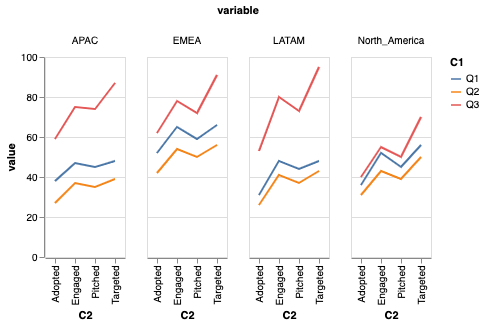

In [13]:
df12 = load_input_table("012.json")

display(df12)

df12 = pd.melt(df12, id_vars=["C1", "C2"], value_vars=["EMEA", "LATAM", "North_America", "APAC"])

display(df12)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "C2", "type": "nominal" },
        "column": {"field": "variable", "type": "nominal"},
        "color": {"field": "C1", "type": "nominal"}
    }
}

#print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df12)

#print(json.dumps(wrap_vl_json(vl_spec, df12)))

Totals Value  alpha  beta  gamma
0       7     A      2     2      3
1       8     B      2     3      3
2       9     C      3     3      3
3       9     D      3     4      2
4       9     E      4     3      2

Totals Value variable  value
0        7     A    alpha      2
1        8     B    alpha      2
2        9     C    alpha      3
3        9     D    alpha      3
4        9     E    alpha      4
..     ...   ...      ...    ...
10       7     A    gamma      3
11       8     B    gamma      3
12       9     C    gamma      3
13       9     D    gamma      2
14       9     E    gamma      2

[15 rows x 4 columns]

Totals Value variable  value  cumsum
0        7     A    alpha      2       2
1        8     B    alpha      2       2
2        9     C    alpha      3       3
3        9     D    alpha      3       3
4        9     E    alpha      4       4
..     ...   ...      ...    ...     ...
10       7     A    gamma      3       7
11       8     B    gamma      3       8
12       9     C    gamma      3       9
13       9     D    gamma      2       9
14       9     E    gamma      2       9

[15 rows x 5 columns]

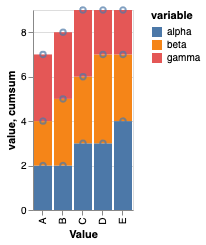

In [14]:
df13 = load_input_table("013.json")

display(df13)

df13 = pd.melt(df13, id_vars=["Totals", "Value"], value_vars=["alpha", "beta", "gamma"])

display(df13)

df13['cumsum'] = df13.groupby("Value")['value'].transform(pd.Series.cumsum)

display(df13)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [{
        "mark": "bar",
        "encoding": {
            "x": { "field": "Value", "type": "nominal" },
            "y": { "field": "value", "type": "quantitative"},
            "color": {"field": "variable", "type": "nominal"},
            "order": {"field": "variable", "type": "quantitative", "sort": "ascending"}
        }
    },  {
      "mark": "point",
      "encoding": {
        "x": { "field": "Value", "type": "nominal" },
        "y": { "field": "cumsum", "type": "quantitative"},
        "text": {"field": "value", "type": "quantitative"}
      }
    }]
}

VegaLite(vl_spec, df13)

Duration End of Shift  Period  Shift Start of Shift
0         60   110 / 1090       1      1      50 / 1150
1         48    272 / 928       1      2      224 / 976
2         40    419 / 781       1      3      379 / 821
3         56    601 / 599       1      4      545 / 655
4         81    840 / 360       1      5      759 / 441
..       ...          ...     ...    ...            ...
15        51    376 / 824       3     16      325 / 875
16        23    564 / 636       3     17      541 / 659
17        10    694 / 506       3     18      684 / 516
18        80    775 / 425       3     19      695 / 505
19       213     1200 / 0       3     20      987 / 213

[20 rows x 5 columns]

Duration End of Shift  Period  Shift Start of Shift    s1
0         60   110 / 1090       1      1      50 / 1150   110
1         48    272 / 928       1      2      224 / 976   272
2         40    419 / 781       1      3      379 / 821   419
3         56    601 / 599       1      4      545 / 655   601
4         81    840 / 360       1      5      759 / 441   840
..       ...          ...     ...    ...            ...   ...
15        51    376 / 824       3     16      325 / 875   376
16        23    564 / 636       3     17      541 / 659   564
17        10    694 / 506       3     18      684 / 516   694
18        80    775 / 425       3     19      695 / 505   775
19       213     1200 / 0       3     20      987 / 213  1200

[20 rows x 6 columns]

Duration End of Shift  Period  Shift Start of Shift    s1   s0
0         60   110 / 1090       1      1      50 / 1150   110   50
1         48    272 / 928       1      2      224 / 976   272  224
2         40    419 / 781       1      3      379 / 821   419  379
3         56    601 / 599       1      4      545 / 655   601  545
4         81    840 / 360       1      5      759 / 441   840  759
..       ...          ...     ...    ...            ...   ...  ...
15        51    376 / 824       3     16      325 / 875   376  325
16        23    564 / 636       3     17      541 / 659   564  541
17        10    694 / 506       3     18      684 / 516   694  684
18        80    775 / 425       3     19      695 / 505   775  695
19       213     1200 / 0       3     20      987 / 213  1200  987

[20 rows x 7 columns]

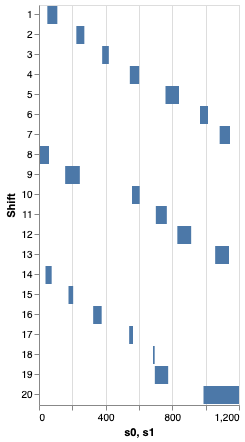

In [15]:
df14 = load_input_table("014.json")

display(df14)

split_col = df14["End of Shift"].str.split("/", expand=True)
df14["s1"] = [int(x) for x in split_col[0]]

display(df14)

split_col = df14["Start of Shift"].str.split("/", expand=True)
df14["s0"] = [int(x) for x in split_col[0]]

display(df14)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "s0", "type": "quantitative"},
        "x2": { "field": "s1", "type": "quantitative"},
        "y": { "field": "Shift", "type": "nominal"}
    }
}

#print(json.dumps(vl_spec, indent=4))

VegaLite(vl_spec, df14)

Duration End of Shift  Period  Shift Start of Shift
0         60   110 / 1090       1      1      50 / 1150
1         48    272 / 928       1      2      224 / 976
2         40    419 / 781       1      3      379 / 821
3         56    601 / 599       1      4      545 / 655
4         81    840 / 360       1      5      759 / 441
..       ...          ...     ...    ...            ...
15        51    376 / 824       3     16      325 / 875
16        23    564 / 636       3     17      541 / 659
17        10    694 / 506       3     18      684 / 516
18        80    775 / 425       3     19      695 / 505
19       213     1200 / 0       3     20      987 / 213

[20 rows x 5 columns]

Duration End of Shift  Period  Shift Start of Shift    s1
0         60   110 / 1090       1      1      50 / 1150   110
1         48    272 / 928       1      2      224 / 976   272
2         40    419 / 781       1      3      379 / 821   419
3         56    601 / 599       1      4      545 / 655   601
4         81    840 / 360       1      5      759 / 441   840
..       ...          ...     ...    ...            ...   ...
15        51    376 / 824       3     16      325 / 875   376
16        23    564 / 636       3     17      541 / 659   564
17        10    694 / 506       3     18      684 / 516   694
18        80    775 / 425       3     19      695 / 505   775
19       213     1200 / 0       3     20      987 / 213  1200

[20 rows x 6 columns]

Duration End of Shift  Period  Shift Start of Shift    s1   s0
0         60   110 / 1090       1      1      50 / 1150   110   50
1         48    272 / 928       1      2      224 / 976   272  224
2         40    419 / 781       1      3      379 / 821   419  379
3         56    601 / 599       1      4      545 / 655   601  545
4         81    840 / 360       1      5      759 / 441   840  759
..       ...          ...     ...    ...            ...   ...  ...
15        51    376 / 824       3     16      325 / 875   376  325
16        23    564 / 636       3     17      541 / 659   564  541
17        10    694 / 506       3     18      684 / 516   694  684
18        80    775 / 425       3     19      695 / 505   775  695
19       213     1200 / 0       3     20      987 / 213  1200  987

[20 rows x 7 columns]

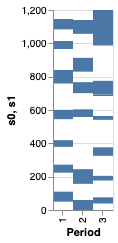

In [16]:
df15 = load_input_table("015.json")

display(df15)

split_col = df15["End of Shift"].str.split("/", expand=True)
df15["s1"] =  [int(x) for x in split_col[0]]

display(df15)

split_col = df15["Start of Shift"].str.split("/", expand=True)
df15["s0"] =  [int(x) for x in split_col[0]]

display(df15)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "rect",
    "encoding": {
        "y": { "field": "s0", "type": "quantitative"},
        "x": { "field": "Period", "type": "nominal"},
        "y2": { "field": "s1", "type": "quantitative"},
    }
}

VegaLite(vl_spec, df15)

Amount Revenue  Variance Variance %  Year  Year Label
0  773000   $773K     39000        +5%  2011        2011
1  812000   $812K   -445000       -55%  2012        2012
2  367000   $367K    117000       +32%  2013        2013
3  484000   $484K    278000       +57%  2014        2014
4  762000   $762K   -201000       -26%  2015        2015
5  561000   $561K    213000       +38%  2016        2016
6  774000   $774K     14500             2017        2017

Amount Revenue  Variance Variance %  Year  Year Label       c
0  773000   $773K     39000        +5%  2011        2011  812000
1  812000   $812K   -445000       -55%  2012        2012  367000
2  367000   $367K    117000       +32%  2013        2013  484000
3  484000   $484K    278000       +57%  2014        2014  762000
4  762000   $762K   -201000       -26%  2015        2015  561000
5  561000   $561K    213000       +38%  2016        2016  774000
6  774000   $774K     14500             2017        2017  788500

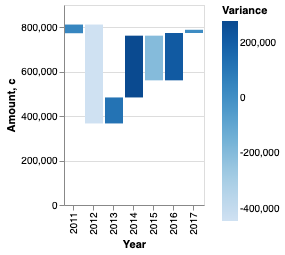

In [17]:
df16 = load_input_table("016.json")

display(df16)

df16["c"] = df16["Amount"] + df16["Variance"]

display(df16)

vl_spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "Year", "type": "nominal"},
        "y": { "field": "Amount", "type": "quantitative"},
        "y2": { "field": "c", "type": "quantitative"},
        "color": {"field": "Variance", "type": "quantitative"}
    }
}

VegaLite(vl_spec, df16)

Actual  Projected  Year
0     1000          0  2001
1     1050          0  2002
2     1110          0  2003
3     1180          0  2004
4     1260          0  2005
..     ...        ...   ...
16    3000          0  2017
17    3210       3210  2018
18       0       4960  2025
19       0       6510  2030
20       0      10360  2040

[21 rows x 3 columns]

Year   variable  value
0   2001     Actual   1000
1   2002     Actual   1050
2   2003     Actual   1110
3   2004     Actual   1180
4   2005     Actual   1260
..   ...        ...    ...
37  2017  Projected      0
38  2018  Projected   3210
39  2025  Projected   4960
40  2030  Projected   6510
41  2040  Projected  10360

[42 rows x 3 columns]

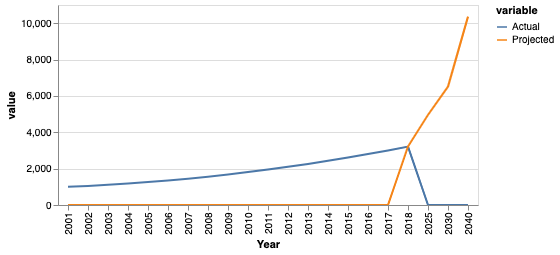

In [18]:
df17 = load_input_table("017.json")

display(df17)

df17 = pd.melt(df17, id_vars=["Year"], value_vars=["Actual", "Projected"])

display(df17)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "x": { "field": "Year", "type": "nominal"},
        "y": { "field": "value", "type": "quantitative"},
        "color": { "field": "variable", "type": "nominal"}
}}

VegaLite(spec, df17)

2012  2013  2014  2015               Item
0    20    12    13    12  Desktop Computers
1    34    45    40    39            Laptops
2    12    10    17    15           Monitors
3    78    13    90    14           Printers

Item variable  value
0   Desktop Computers     2012     20
1             Laptops     2012     34
2            Monitors     2012     12
3            Printers     2012     78
4   Desktop Computers     2013     12
..                ...      ...    ...
11           Printers     2014     90
12  Desktop Computers     2015     12
13            Laptops     2015     39
14           Monitors     2015     15
15           Printers     2015     14

[16 rows x 3 columns]

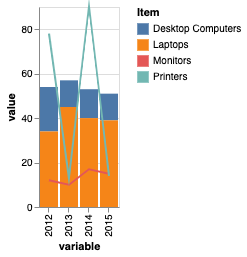

In [19]:
df18 = load_input_table("018.json")

display(df18)

df18 = pd.melt(df18, id_vars='Item', value_vars=["2012", "2013", "2014", "2015"])

display(df18)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [{
        "mark": "bar",
        "transform": [{"filter": "datum.Item == \"Desktop Computers\" || datum.Item == \"Laptops\""}],
        "encoding": {
            "x": { "field": "variable", "type": "nominal"},
            "y": { "field": "value", "type": "quantitative"},
            "color": {"field": "Item", "type": "nominal"},
        }},{
        "mark": {"type": "line"},
        "transform": [{"filter": "datum.Item != \"Desktop Computers\" && datum.Item != \"Laptops\""}],
        "encoding": {
            "x": { "field": "variable", "type": "nominal"},
            "y": { "field": "value", "type": "quantitative"},
            "color": {"field": "Item", "type": "nominal"},
        }
    }]
}

VegaLite(spec, df18)

Customer ID  Duration  Purchase Amount Representative
0          C0287       102               85           R003
1          C0076       109              195           R006
2          C0205        68               55           R006
3          C0154        68               90           R006
4          C0096        95                0           R004
...          ...       ...              ...            ...
2542       C0198        60               90           R005
2543       C0078        84               50           R006
2544       C0103       114               55           R003
2545       C0092        98              180           R007
2546       C0051        90              130           R002

[2547 rows x 4 columns]

cuts  Customer ID  Duration  Purchase Amount  Representative
0     (-0.0, 10.0]          533       533              533             533
1     (10.0, 20.0]            0         0                0               0
2     (20.0, 30.0]            0         0                0               0
3     (30.0, 40.0]            0         0                0               0
4     (40.0, 50.0]           72        72               72              72
..             ...          ...       ...              ...             ...
15  (150.0, 160.0]          142       142              142             142
16  (160.0, 170.0]          136       136              136             136
17  (170.0, 180.0]          136       136              136             136
18  (180.0, 190.0]          130       130              130             130
19  (190.0, 200.0]          153       153              153             153

[20 rows x 5 columns]

cuts  Customer ID  Duration  Purchase Amount  Representative  csum
0      (0,10]          533       533              533             533   533
1     (10,20]            0         0                0               0   533
2     (20,30]            0         0                0               0   533
3     (30,40]            0         0                0               0   533
4     (40,50]           72        72               72              72   605
..        ...          ...       ...              ...             ...   ...
15  (150,160]          142       142              142             142  1992
16  (160,170]          136       136              136             136  2128
17  (170,180]          136       136              136             136  2264
18  (180,190]          130       130              130             130  2394
19  (190,200]          153       153              153             153  2547

[20 rows x 6 columns]

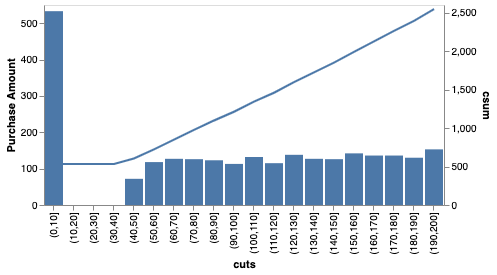

In [20]:
df19 = load_input_table("019.json")

display(df19)

df19["cuts"] = pd.cut(df19['Purchase Amount'], 20, precision=0)
df19 = df19.groupby(['cuts']).count().reset_index()

display(df19)

df19["csum"] = df19["Purchase Amount"].cumsum()
df19["cuts"] = [str("({},{}]".format(int(x.left), int(x.right))) for x in df19["cuts"]]

display(df19)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [{
        "mark": "bar",
        "encoding": {
            "x": { "field": "cuts", "type": "ordinal", "sort": "none"},
            "y": { "field": "Purchase Amount", "type": "quantitative"},
        }
    },{
        "mark": "line",
        "encoding": {
            "x": { "field": "cuts", "type": "ordinal", "sort": "none"},
            "y": { "field": "csum", "type": "quantitative"},
            "order": {"field": "id", "type": "ordinal"}
        }
    }],
    "resolve": {"scale": {"y": "independent"}}
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df19)

Amount    Category         Country        Date  Order ID   Product
0      4270  Vegetables   United States    1/6/2012         1   Carrots
1      8239  Vegetables  United Kingdom    1/7/2012         2  Broccoli
2       617       Fruit   United States    1/8/2012         3    Banana
3      8384       Fruit          Canada   1/10/2012         4    Banana
4      2626  Vegetables         Germany   1/10/2012         5     Beans
..      ...         ...             ...         ...       ...       ...
208    1777       Fruit          France  12/28/2012       209     Apple
209     680  Vegetables          France  12/28/2012       210     Beans
210     958       Fruit   United States  12/29/2012       211    Orange
211    2613  Vegetables       Australia  12/29/2012       212   Carrots
212     339  Vegetables       Australia  12/30/2012       213   Carrots

[213 rows x 6 columns]

Product         Country  Amount
0    Apple       Australia   20634
1    Apple          Canada   24867
2    Apple          France   80193
3    Apple         Germany    9082
4    Apple     New Zealand   10332
..     ...             ...     ...
39  Orange          France    2256
40  Orange         Germany    8887
41  Orange     New Zealand   12010
42  Orange  United Kingdom   21744
43  Orange   United States   30932

[44 rows x 3 columns]

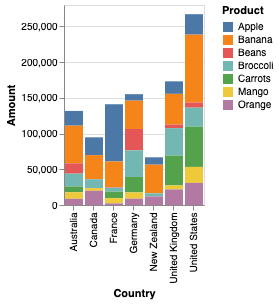

In [21]:
df20 = load_input_table("020.json")

display(df20)

df20 = df20.groupby(['Product', "Country"])["Amount"].sum().reset_index()

display(df20)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "Country", "type": "nominal"},
        "color": { "field": "Product", "type": "nominal"},
        "y": { "field": "Amount", "type": "quantitative"}        
    }
}

VegaLite(spec, df20)

Beans  Broccoli  Carrots         Country  Total Result
0  14433     17953     8106       Australia         40492
1      0     12407        0          Canada         12407
2    680      5341     9104          France         15125
3  29905     37197    21636         Germany         88738
4      0      4390        0     New Zealand          4390
5   5100     38436    41815  United Kingdom         85351
6   7163     26715    56284   United States         90162
7  57281    142439   136945    Total Result        336665

Country  Total Result variable   value
0        Australia         40492    Beans   14433
1           Canada         12407    Beans       0
2           France         15125    Beans     680
3          Germany         88738    Beans   29905
4      New Zealand          4390    Beans       0
..             ...           ...      ...     ...
19         Germany         88738  Carrots   21636
20     New Zealand          4390  Carrots       0
21  United Kingdom         85351  Carrots   41815
22   United States         90162  Carrots   56284
23    Total Result        336665  Carrots  136945

[24 rows x 4 columns]

Country  Total Result variable  value
0        Australia         40492    Beans  14433
1           Canada         12407    Beans      0
2           France         15125    Beans    680
3          Germany         88738    Beans  29905
4      New Zealand          4390    Beans      0
..             ...           ...      ...    ...
18          France         15125  Carrots   9104
19         Germany         88738  Carrots  21636
20     New Zealand          4390  Carrots      0
21  United Kingdom         85351  Carrots  41815
22   United States         90162  Carrots  56284

[21 rows x 4 columns]

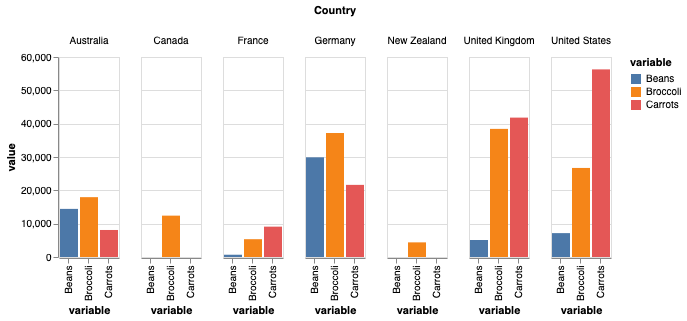

In [22]:
df21 = load_input_table("021.json")

display(df21)

df21 = pd.melt(df21, id_vars=['Country', "Total Result"], value_vars=["Beans", "Broccoli", "Carrots"])

display(df21)

df21 = df21[df21["Country"] != "Total Result"]

display(df21)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "variable", "type": "nominal"},
        "color": { "field": "variable", "type": "nominal"},
        "y": { "field": "value", "type": "quantitative"},
        "column": { "field": "Country", "type": "nominal"},
        
    }
}

VegaLite(spec, df21)

2008  2009  2010  2011  2012  2013       label
0    61    70     4    55   144   132  Category 1
1   128    22    91    61    55    47  Category 2
2    12    95    35    12    22    82  Category 3
3    93    24    16    27    55    13  Category 4
4    88    73   129    23   101    23  Category 5
5    22    28    94    74    60    83  Category 6

label variable  value
0   Category 1     2008     61
1   Category 2     2008    128
2   Category 3     2008     12
3   Category 4     2008     93
4   Category 5     2008     88
..         ...      ...    ...
31  Category 2     2013     47
32  Category 3     2013     82
33  Category 4     2013     13
34  Category 5     2013     23
35  Category 6     2013     83

[36 rows x 3 columns]

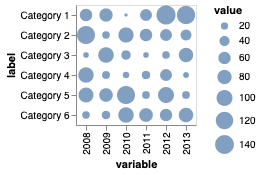

In [23]:
df22 = load_input_table("022.json")

display(df22)

df22 = pd.melt(df22, id_vars='label', value_vars=["2008", "2009", "2010", "2011", "2012", "2013"])

display(df22)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "circle",
    "encoding": {
        "x": { "field": "variable", "type": "nominal"},
        "size": { "field": "value", "type": "quantitative"},
        "y": { "field": "label", "type": "nominal"}
    }
}

VegaLite(spec, df22)

data_ora      site      type  value
0         6_0    e90e50  computer     22
1         6_0    e90e50    mobile      8
2         6_0  e90e50fx  computer     17
3         6_0  e90e50fx    mobile      5
4         6_1    e90e50  computer      8
...       ...       ...       ...    ...
1981    30_15    e90e50    mobile      9
1982    30_15  e90e50fx  computer      9
1983    30_15  e90e50fx    mobile      8
1984    30_16    e90e50  computer     21
1985    30_16    e90e50    mobile     14

[1986 rows x 4 columns]

data_ora      site      type  value day hour
0         6_0    e90e50  computer     22   6    0
1         6_0    e90e50    mobile      8   6    0
2         6_0  e90e50fx  computer     17   6    0
3         6_0  e90e50fx    mobile      5   6    0
4         6_1    e90e50  computer      8   6    1
...       ...       ...       ...    ...  ..  ...
1981    30_15    e90e50    mobile      9  30   15
1982    30_15  e90e50fx  computer      9  30   15
1983    30_15  e90e50fx    mobile      8  30   15
1984    30_16    e90e50  computer     21  30   16
1985    30_16    e90e50    mobile     14  30   16

[1986 rows x 6 columns]

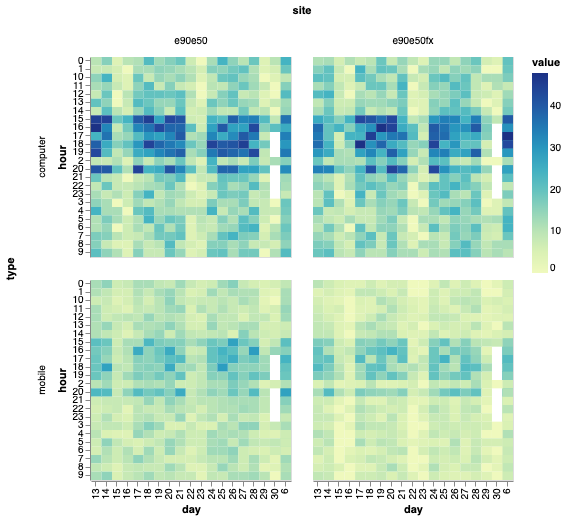

In [24]:
df23 = load_input_table("023.json")

display(df23)

split_col = df23["data_ora"].str.split("_", expand=True)
df23["day"] =  [str(x) for x in split_col[0]]
df23["hour"] =  [str(x) for x in split_col[1]]

display(df23)

spec = {
    "height": 200,
    "width": 200,
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "rect",
    "encoding": {
        "x": { "field": "day", "type": "nominal"},
        "color": { "field": "value", "type": "quantitative"},
        "y": { "field": "hour", "type": "nominal"},
        "column": { "field": "site", "type": "nominal"},
        "row": { "field": "type", "type": "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df23)

Duration           Parts  Start Date
0    864000      Foundation   959842800
1    604800           Walls   960793200
2    864000            Roof   961484400
3    432000  Windows, Doors   962434800
4    259200        Plumbing   962953200
5    259200        Electric   962953200
6    172800        Painting   963298800
7    172800        Flooring   963471600

Duration           Parts  Start Date   End Date
0    864000      Foundation   959842800  960706800
1    604800           Walls   960793200  961398000
2    864000            Roof   961484400  962348400
3    432000  Windows, Doors   962434800  962866800
4    259200        Plumbing   962953200  963212400
5    259200        Electric   962953200  963212400
6    172800        Painting   963298800  963471600
7    172800        Flooring   963471600  963644400

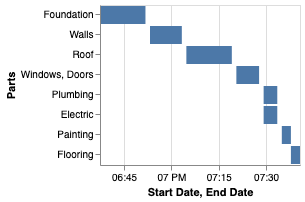

In [25]:
df24 = load_input_table("024.json")

display(df24)

df24["End Date"] = df24["Start Date"] + df24['Duration']

display(df24)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "y": { "field": "Parts", "type": "nominal", "sort": "null"},
        "x": { "field": "Start Date", "type": "temporal"},
        "x2": { "field": "End Date", "type": "temporal"}
    }
}

VegaLite(spec, df24)

Complaint Type  Count
0          Too noisy     27
1         Overpriced    789
2  Food is tasteless     65
3     Food not fresh      9
4  Food is too salty     15
5          Not clean     30
6   Unfriendly staff     12
7          Wait time    109
8      No atmosphere     45
9     Small portions    621

Complaint Type  Count  cumsum
0          Too noisy     27      27
1         Overpriced    789     816
2  Food is tasteless     65     881
3     Food not fresh      9     890
4  Food is too salty     15     905
5          Not clean     30     935
6   Unfriendly staff     12     947
7          Wait time    109    1056
8      No atmosphere     45    1101
9     Small portions    621    1722

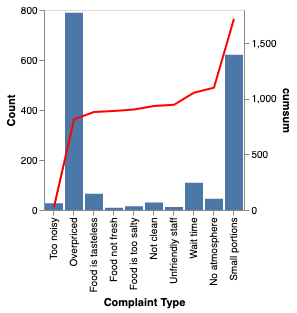

In [26]:
df25 = load_input_table("025.json")

display(df25)

df25["cumsum"] = df25["Count"].cumsum()

display(df25)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer":[{
        "mark": "bar",
        "encoding": {
            "x": { "field": "Complaint Type", "type": "nominal", "sort": None},
            "y": { "field": "Count", "type": "quantitative"}
        }
    },{
        "mark": {"type": "line", "color": "red"},
        "encoding": {
            "x": { "field": "Complaint Type", "type": "nominal", "sort": None},
            "y": { "field": "cumsum", "type": "quantitative"},
            "order": { "field": "id", "type": "ordinal"}
        }
    }],
  "resolve": {"scale": {"y": "independent"}}
}

VegaLite(spec, df25)

data_ora      site      type  value
0       06_00    e90e50  computer     22
1       06_00    e90e50    mobile      8
2       06_00  e90e50fx  computer     17
3       06_00  e90e50fx    mobile      5
4       06_01    e90e50  computer      8
...       ...       ...       ...    ...
1981    30_15    e90e50    mobile      9
1982    30_15  e90e50fx  computer      9
1983    30_15  e90e50fx    mobile      8
1984    30_16    e90e50  computer     21
1985    30_16    e90e50    mobile     14

[1986 rows x 4 columns]

data_ora      site      type  value day hour
0       06_00    e90e50  computer     22  06   00
1       06_00    e90e50    mobile      8  06   00
2       06_00  e90e50fx  computer     17  06   00
3       06_00  e90e50fx    mobile      5  06   00
4       06_01    e90e50  computer      8  06   01
...       ...       ...       ...    ...  ..  ...
1981    30_15    e90e50    mobile      9  30   15
1982    30_15  e90e50fx  computer      9  30   15
1983    30_15  e90e50fx    mobile      8  30   15
1984    30_16    e90e50  computer     21  30   16
1985    30_16    e90e50    mobile     14  30   16

[1986 rows x 6 columns]

day hour  value
0    06   00    155
1    06   01    149
2    06   02    156
3    06   03    149
4    06   04    139
..   ..  ...    ...
444  30   12     13
445  30   13     18
446  30   14     11
447  30   15     35
448  30   16     35

[449 rows x 3 columns]

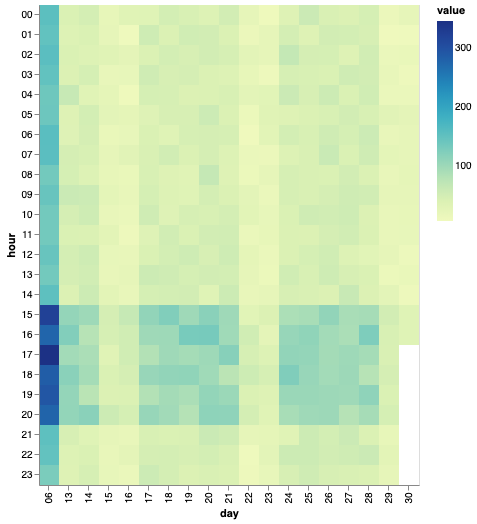

In [27]:
df26 = load_input_table("026.json")

display(df26)

split_col = df26["data_ora"].str.split("_", expand=True)
df26["day"] =  [str(x) for x in split_col[0]]
df26["hour"] =  [str(x) for x in split_col[1]]

display(df26)

df26 = df26.groupby(["day", "hour"])["value"].sum().reset_index()

display(df26)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "rect",
    "encoding": {
        "x": { "field": "day", "type": "ordinal"},
        "color": { "field": "value", "type": "quantitative"},
        "y": { "field": "hour", "type": "ordinal"},
    }
}

VegaLite(spec, df26)

00   01   02     03   04     05     06   07   08    09   10   11  \
0  120  150  240  540.0  210  380.0  120.0  870  250  1100  500  950   
1    0  135  195  390.0  375  295.0  250.0  495  560   675  800  725   
2    0    0    0  262.5  285  342.5  312.5  395  405   585  680  700   
3    0    0    0    0.0    0  273.0  273.0  393  395   488  536  631   

         Period  
0        Actual  
1  Interval = 2  
2  Interval = 4  
3  Interval = 6

Period variable  value
0         Actual       00  120.0
1   Interval = 2       00    0.0
2   Interval = 4       00    0.0
3   Interval = 6       00    0.0
4         Actual       01  150.0
..           ...      ...    ...
43  Interval = 6       10  536.0
44        Actual       11  950.0
45  Interval = 2       11  725.0
46  Interval = 4       11  700.0
47  Interval = 6       11  631.0

[48 rows x 3 columns]

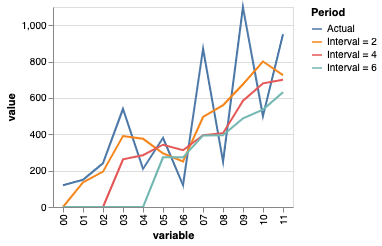

In [28]:
df27 = load_input_table("027.json")

display(df27)

df27 = pd.melt(df27, id_vars=['Period'], value_vars=["00", "01", "02", "03", "04", '05', '06', "07", "08", "09", "10", "11"])

display(df27)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "x": { "field": "variable", "type": "nominal"},
        "y": { "field": "value", "type": "quantitative"},
        "color": { "field": "Period", "type": "nominal"},
    }
}

VegaLite(spec, df27)

Number of students
0                   22
1                   29
2                   40
3                   30
4                   48
..                 ...
13                  40
14                  31
15                  37
16                  21
17                  23

[18 rows x 1 columns]

Number of students          cuts
0                   22  (19.0, 26.0]
1                   29  (26.0, 32.0]
2                   40  (39.0, 45.0]
3                   30  (26.0, 32.0]
4                   48  (45.0, 52.0]
..                 ...           ...
13                  40  (39.0, 45.0]
14                  31  (26.0, 32.0]
15                  37  (32.0, 39.0]
16                  21  (19.0, 26.0]
17                  23  (19.0, 26.0]

[18 rows x 2 columns]

cuts  Number of students
0  (19.0, 26.0]                   9
1  (26.0, 32.0]                   3
2  (32.0, 39.0]                   2
3  (39.0, 45.0]                   2
4  (45.0, 52.0]                   2

cuts  Number of students
0  (19,26]                   9
1  (26,32]                   3
2  (32,39]                   2
3  (39,45]                   2
4  (45,52]                   2

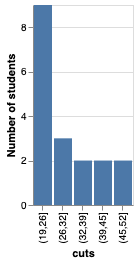

In [29]:
df28 = load_input_table("028.json")

display(df28)

df28["cuts"] = pd.cut(df28['Number of students'], 5, precision=0)

display(df28)

df28 = df28.groupby(['cuts']).count().reset_index()

display(df28)

df28["cuts"] = [str("({},{}]".format(int(x.left), int(x.right))) for x in df28["cuts"]]

display(df28)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "cuts", "type": "nominal"},
        "y": { "field": "Number of students", "type": "quantitative"},
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df28)

Agility  Analytical-Aptitude  Durability  Endurance  Flexibility  \
0      1.63                 3.25        2.13       2.88         2.63   
1      2.75                 7.50        4.38       5.88         1.75   
2      7.38                 6.13        2.63       5.25         5.25   
3      6.75                 6.25        5.63       4.63         4.75   
4      8.13                 7.38        7.75       7.38         5.63   
..      ...                  ...         ...        ...          ...   
55     7.00                 5.88        4.63       5.13         5.13   
56     6.38                 5.63        6.38       7.88         5.00   
57     4.25                 3.25        4.63       4.63         4.75   
58     2.50                 2.38        4.75       4.13         3.38   
59     6.38                 6.38        6.75       6.63         7.50   

    Hand-Eye-Coordination  Nerve  Power  Rank  Speed              Sport  \
0                    6.63   2.75   3.13    55   1.13            Archery   
1                    8.00   9.88   2.63    32   1.63        Auto Racing   
2                    7.25   1.25   4.00    30   5.63          Badminton   
3                    9.25   5.13   7.63     9   6.50  Baseball/Softball   
4                    7.50   4.13   6.50     4   7.25         Basketball   
..                    ...    ...    ...   ...    ...                ...   
55                   7.25   2.88   6.63    20   5.00         Volleyball   
56                   6.25   4.25   6.88    11   5.38         Water Polo   
57                   4.13   5.88   4.50    46   3.00       Water Skiing   
58                   2.25   4.00   9.75    44   2.63     Weight-Lifting   
59                   4.25   5.00   7.13     5   5.13          Wrestling   

    Strength   Total  
0       4.50  30.625  
1       3.50  47.875  
2       3.25  48.000  
3       5.75  62.250  
4       6.25  67.875  
..       ...     ...  
55      4.88  54.375  
56      6.63  60.625  
57      5.00  44.000  
58      9.25  45.000  
59      8.38  63.500  

[60 rows x 13 columns]

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Sport  Rank             variable  value
0              Archery    55            Endurance   2.88
1          Auto Racing    32            Endurance   5.88
2            Badminton    30            Endurance   5.25
3    Baseball/Softball     9            Endurance   4.63
4           Basketball     4            Endurance   7.38
..                 ...   ...                  ...    ...
595         Volleyball    20  Analytical Aptitude    NaN
596         Water Polo    11  Analytical Aptitude    NaN
597       Water Skiing    46  Analytical Aptitude    NaN
598     Weight-Lifting    44  Analytical Aptitude    NaN
599          Wrestling     5  Analytical Aptitude    NaN

[600 rows x 4 columns]

Sport  Rank             variable  value  Archery
0              Archery    55            Endurance   2.88     True
1          Auto Racing    32            Endurance   5.88    False
2            Badminton    30            Endurance   5.25    False
3    Baseball/Softball     9            Endurance   4.63    False
4           Basketball     4            Endurance   7.38    False
..                 ...   ...                  ...    ...      ...
595         Volleyball    20  Analytical Aptitude    NaN    False
596         Water Polo    11  Analytical Aptitude    NaN    False
597       Water Skiing    46  Analytical Aptitude    NaN    False
598     Weight-Lifting    44  Analytical Aptitude    NaN    False
599          Wrestling     5  Analytical Aptitude    NaN    False

[600 rows x 5 columns]

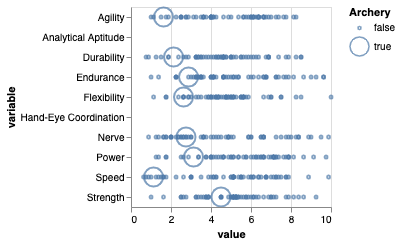

In [30]:
df29 = load_input_table("029.json")

display(df29)

df29 = pd.melt(df29, id_vars=['Sport', "Rank"], 
               value_vars=["Endurance", "Strength", "Power", "Speed", 
                           "Agility", "Flexibility", "Nerve", "Durability", 
                           "Hand-Eye Coordination", "Analytical Aptitude"])

display(df29)

df29["Archery"] = df29["Sport"] == "Archery"

display(df29)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "point",
    "encoding": {
        "x": { "field": "value", "type": "quantitative"},
        "y": { "field": "variable", "type": "nominal"},
        "size": {"field": "Archery", 'type': "nominal"}
    }
   
}

VegaLite(spec, df29)

Agility  Analytical-Aptitude  Durability  Endurance  Flexibility  \
0      1.63                 3.25        2.13       2.88         2.63   
1      2.75                 7.50        4.38       5.88         1.75   
2      7.38                 6.13        2.63       5.25         5.25   
3      6.75                 6.25        5.63       4.63         4.75   
4      8.13                 7.38        7.75       7.38         5.63   
..      ...                  ...         ...        ...          ...   
55     7.00                 5.88        4.63       5.13         5.13   
56     6.38                 5.63        6.38       7.88         5.00   
57     4.25                 3.25        4.63       4.63         4.75   
58     2.50                 2.38        4.75       4.13         3.38   
59     6.38                 6.38        6.75       6.63         7.50   

    Hand-Eye-Coordination  Nerve  Power  Rank  Speed              Sport  \
0                    6.63   2.75   3.13    55   1.13            Archery   
1                    8.00   9.88   2.63    32   1.63        Auto Racing   
2                    7.25   1.25   4.00    30   5.63          Badminton   
3                    9.25   5.13   7.63     9   6.50  Baseball/Softball   
4                    7.50   4.13   6.50     4   7.25         Basketball   
..                    ...    ...    ...   ...    ...                ...   
55                   7.25   2.88   6.63    20   5.00         Volleyball   
56                   6.25   4.25   6.88    11   5.38         Water Polo   
57                   4.13   5.88   4.50    46   3.00       Water Skiing   
58                   2.25   4.00   9.75    44   2.63     Weight-Lifting   
59                   4.25   5.00   7.13     5   5.13          Wrestling   

    Strength   Total  
0       4.50  30.625  
1       3.50  47.875  
2       3.25  48.000  
3       5.75  62.250  
4       6.25  67.875  
..       ...     ...  
55      4.88  54.375  
56      6.63  60.625  
57      5.00  44.000  
58      9.25  45.000  
59      8.38  63.500  

[60 rows x 13 columns]

Sport  Rank             variable  value
0              Archery    55            Endurance   2.88
1          Auto Racing    32            Endurance   5.88
2            Badminton    30            Endurance   5.25
3    Baseball/Softball     9            Endurance   4.63
4           Basketball     4            Endurance   7.38
..                 ...   ...                  ...    ...
595         Volleyball    20  Analytical Aptitude    NaN
596         Water Polo    11  Analytical Aptitude    NaN
597       Water Skiing    46  Analytical Aptitude    NaN
598     Weight-Lifting    44  Analytical Aptitude    NaN
599          Wrestling     5  Analytical Aptitude    NaN

[600 rows x 4 columns]

Sport  Rank             variable  value  Archery
0              Archery    55            Endurance   2.88     True
1          Auto Racing    32            Endurance   5.88    False
2            Badminton    30            Endurance   5.25    False
3    Baseball/Softball     9            Endurance   4.63    False
4           Basketball     4            Endurance   7.38    False
..                 ...   ...                  ...    ...      ...
595         Volleyball    20  Analytical Aptitude    NaN    False
596         Water Polo    11  Analytical Aptitude    NaN    False
597       Water Skiing    46  Analytical Aptitude    NaN    False
598     Weight-Lifting    44  Analytical Aptitude    NaN    False
599          Wrestling     5  Analytical Aptitude    NaN    False

[600 rows x 5 columns]

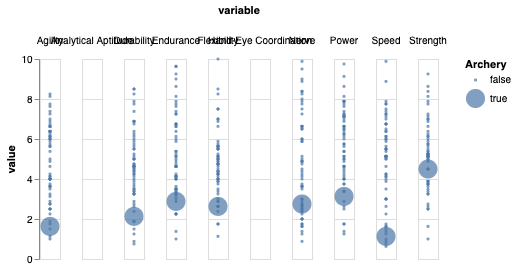

In [31]:
df30 = load_input_table("030.json")

display(df30)

df30 = pd.melt(df30, id_vars=['Sport', "Rank"], 
                     value_vars=["Endurance", "Strength", "Power", "Speed", "Agility", "Flexibility", "Nerve", "Durability", "Hand-Eye Coordination", "Analytical Aptitude"])
display(df30)

df30["Archery"] = df30["Sport"] == "Archery"

display(df30)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "circle",
    "encoding": {
        "y": { "field": "value", "type": "quantitative"},
        "column": {"field": "variable", 'type': "nominal"},
        "size": {"field": "Archery", 'type': "nominal"}
    }
}

#print(json.dumps(spec, indent=4))

VegaLite(spec, df30)

Business Group  Emp Num   Group Name  Noise       Performance Rating  \
0                  4    11505  Development -0.152   Successful Performance   
1                  4    11529  Development  0.079   Successful Performance   
2                  4    11537  Development  0.639  Outstanding Performance   
3                  4    11538  Development -0.406              Not Meeting   
4                  4    11539  Development -0.222            Achieved Most   
...              ...      ...          ...    ...                      ...   
3681               6    53633      Support -0.489   Successful Performance   
3682               4    53644  Development -0.281   Successful Performance   
3683               6    53657      Support -0.507   Successful Performance   
3684               6    53659      Support  0.031            Achieved Most   
3685               6    53669      Support  0.650   Successful Performance   

      Rating 17 (number)  Ratings X  Salary Increase $ Total Increase  
0                      3     46.098                0.0           #N/A  
1                      3     46.329             1644.0           1644  
2                      4     49.389                0.0           #N/A  
3                      1     40.844                0.0           #N/A  
4                      2     43.528                0.0           #N/A  
...                  ...        ...                ...            ...  
3681                   3     65.761             1256.0           1256  
3682                   3     45.969              527.0            527  
3683                   3     65.743             1621.0           1621  
3684                   2     63.781                0.0           #N/A  
3685                   3     66.900                0.0           #N/A  

[3686 rows x 9 columns]

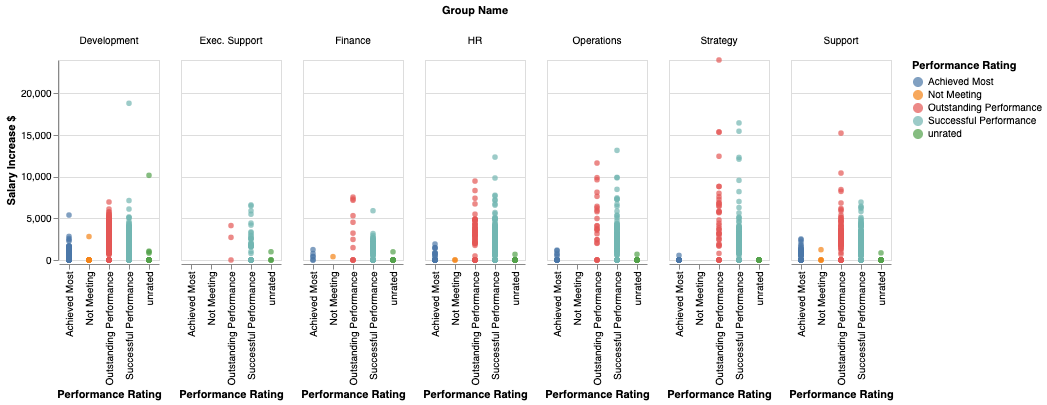

In [32]:
df31 = load_input_table("031.json")

display(df31)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "circle",
    "encoding": {
        "x": { "field": "Performance Rating", "type": "nominal"},
        "color": { "field": "Performance Rating", "type": "nominal"},
        "column": {"field": "Group Name", 'type': "nominal"},
        "y": {"field": "Salary Increase $", 'type': "quantitative"}
    }
   
}

VegaLite(spec, df31)

Serie1_y  Serie2_y  id
0         63        98   0
1        123       129   1
2        213       164   2
3        234       198   3
4        322       296   4
..       ...       ...  ..
14       736       772  14
15       778       799  15
16       786       882  16
17       879       976  17
18       968       990  18

[19 rows x 3 columns]

id  variable  value
0    0  Serie1_y     63
1    1  Serie1_y    123
2    2  Serie1_y    213
3    3  Serie1_y    234
4    4  Serie1_y    322
..  ..       ...    ...
33  14  Serie2_y    772
34  15  Serie2_y    799
35  16  Serie2_y    882
36  17  Serie2_y    976
37  18  Serie2_y    990

[38 rows x 3 columns]

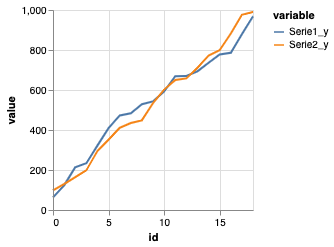

In [33]:
df32 = load_input_table("032.json")

display(df32)

df32 = pd.melt(df32, id_vars="id", value_vars=["Serie1_y", "Serie2_y"])

display(df32)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "x": { "field": "id", "type": "quantitative"},
        "color": { "field": "variable", "type": "nominal"},
        "y": {"field": "value", 'type': "quantitative"}
    }
   
}

VegaLite(spec, df32)

0        10        100      1000      1005       1010       1015  \
0    3172.45  1205.930   1479.560   75212.6   74387.9   75393.60   75954.50   
1   16784.60  6004.490   2737.210   49212.3   48619.6   49159.20   50595.30   
2       0.00     0.000      0.000   54906.7   53611.8   51032.00   50667.70   
3    1154.16     0.000      0.000  120937.1  116207.8  114580.80  115781.90   
4       0.00     0.000      0.000   46765.1   47139.1   40548.20   40507.10   
..       ...       ...        ...       ...       ...        ...        ...   
23      0.00     0.000    755.007   11142.8   10744.8    9899.44    8718.54   
24   7253.19  6850.080  28349.800  328816.1  329391.8  308762.50  301857.70   
25   1386.22   715.649  19741.400   67439.3   62713.7   53909.90   52079.10   
26   7982.05  7162.830  61429.500  199496.2  193342.3  184329.80  182736.30   
27   2859.66  3159.760  30719.300   88192.7   83107.1   68937.20   62240.90   

         1020       1025       1030               ...                     960  \
0    77690.00   77070.60   77357.70               ...                 65274.7   
1    55186.90   52659.10   55381.00               ...                 40302.0   
2    54704.90   47045.90   49792.50               ...                 58043.1   
3   116967.80  108028.60  113455.10               ...                121686.3   
4    42864.70   35195.50   35683.40               ...                 40750.0   
..        ...        ...        ...               ...                     ...   
23    9432.52    7653.61    7183.39               ...                 27285.2   
24  354141.00  272965.20  273351.00               ...                441884.2   
25   60511.30   52597.60   52316.80               ...                 86093.3   
26  207678.30  172313.80  164014.30               ...                272967.6   
27   75987.50   68882.80   63607.60               ...                120963.7   

         965       970       975       980       985       990       995  \
0    67765.1   67883.8   72025.0   72543.1   70808.9   75420.7   71472.4   
1    37804.7   36861.0   40834.8   40151.3   41924.3   48900.5   47736.4   
2    54908.5   59352.8   53993.0   54879.9   53740.9   59549.4   54906.7   
3   119310.0  117240.7  120032.7  118735.2  119911.1  123270.0  118024.1   
4    43156.1   45632.8   46652.3   45870.1   47491.3   45889.2   46245.4   
..       ...       ...       ...       ...       ...       ...       ...   
23   21811.4   21035.2   21236.9   18842.6   17237.4   18325.3   13660.4   
24  370211.5  382535.0  378139.6  349542.3  343298.5  398242.1  337030.4   
25   77414.0   77101.7   73803.7   66590.3   62840.5   61826.5   62120.7   
26  238637.5  243965.4  249357.7  235274.7  221167.7  235515.2  194509.6   
27  102800.2  103148.2  105850.6  102466.2  101807.0  102187.2   89392.5   

    Peak                        activity  
0   1320               Playing billiards  
1   1290                         Dancing  
2   1170                        Softball  
3      0                         Bowling  
4   1165              Playing volleyball  
..   ...                             ...  
23   540                  Doing aerobics  
24   510                         Walking  
25   480                         Running  
26   360        Working out, unspecified  
27     0  Using cardiovascular equipment  

[28 rows x 290 columns]

activity variable      value
0                  Playing billiards        0   3172.450
1                            Dancing        0  16784.600
2                           Softball        0      0.000
3                            Bowling        0   1154.160
4                 Playing volleyball        0      0.000
...                              ...      ...        ...
8059                  Doing aerobics     1435      0.000
8060                         Walking     1435   4370.690
8061                         Running     1435   1386.220
8062        Working out, unspecified     1435   3485.720
8063  Using cardiovascular equipment     1435    894.043

[8064 rows x 3 columns]

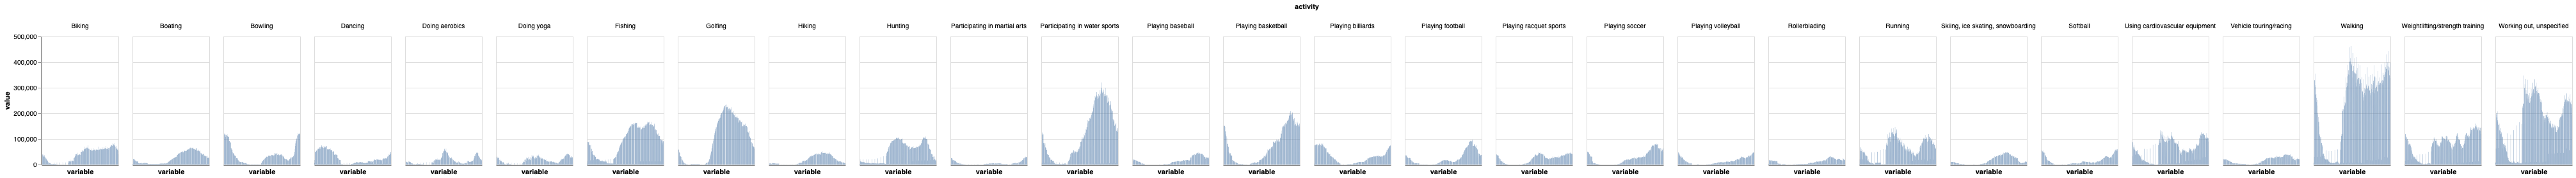

In [34]:
df33 = load_input_table("033.json")

display(df33)

df33 = pd.melt(df33, id_vars="activity", value_vars=["0", "5", "10", "15", "20", "25", "30", "35", "40", "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", "95", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155", "160", "165", "170", "175", "180", "185", "190", "195", "200", "205", "210", "215", "220", "225", "230", "235", "240", "245", "250", "255", "260", "265", "270", "275", "280", "285", "290", "295", "300", "305", "310", "315", "320", "325", "330", "335", "340", "345", "350", "355", "360", "365", "370", "375", "380", "385", "390", "395", "400", "405", "410", "415", "420", "425", "430", "435", "440", "445", "450", "455", "460", "465", "470", "475", "480", "485", "490", "495", "500", "505", "510", "515", "520", "525", "530", "535", "540", "545", "550", "555", "560", "565", "570", "575", "580", "585", "590", "595", "600", "605", "610", "615", "620", "625", "630", "635", "640", "645", "650", "655", "660", "665", "670", "675", "680", "685", "690", "695", "700", "705", "710", "715", "720", "725", "730", "735", "740", "745", "750", "755", "760", "765", "770", "775", "780", "785", "790", "795", "800", "805", "810", "815", "820", "825", "830", "835", "840", "845", "850", "855", "860", "865", "870", "875", "880", "885", "890", "895", "900", "905", "910", "915", "920", "925", "930", "935", "940", "945", "950", "955", "960", "965", "970", "975", "980", "985", "990", "995", "1000", "1005", "1010", "1015", "1020", "1025", "1030", "1035", "1040", "1045", "1050", "1055", "1060", "1065", "1070", "1075", "1080", "1085", "1090", "1095", "1100", "1105", "1110", "1115", "1120", "1125", "1130", "1135", "1140", "1145", "1150", "1155", "1160", "1165", "1170", "1175", "1180", "1185", "1190", "1195", "1200", "1205", "1210", "1215", "1220", "1225", "1230", "1235", "1240", "1245", "1250", "1255", "1260", "1265", "1270", "1275", "1280", "1285", "1290", "1295", "1300", "1305", "1310", "1315", "1320", "1325", "1330", "1335", "1340", "1345", "1350", "1355", "1360", "1365", "1370", "1375", "1380", "1385", "1390", "1395", "1400", "1405", "1410", "1415", "1420", "1425", "1430", "1435"])
display(df33)

spec = {
    "width": 120,
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "variable", "type": "nominal"},
        "column": {"field": "activity", 'type': "nominal"},
        "y": {"field": "value", 'type': "quantitative"}
    },
    "config": {"axisX": {"labels": False, "ticks": False}}
}

VegaLite(spec, df33)

Forecast Lower Confidence Bound Timeline Upper Confidence Bound Values
0                                    Jul-15                           436
1                                    Aug-15                           500
2                                    Sep-15                           805
3                                    Oct-15                          5124
4                                    Nov-15                          1674
..      ...                    ...      ...                    ...    ...
10                                   May-16                           584
11     1097                   1097   Jun-16                   1097   1097
12  939.925               -1913.98   Jul-16                3793.83       
13  924.496               -1952.33   Aug-16                3801.32       
14  909.067               -1990.86   Sep-16                3808.99       

[15 rows x 5 columns]

Timeline  variable value
0    Jul-15  Forecast      
1    Aug-15  Forecast      
2    Sep-15  Forecast      
3    Oct-15  Forecast      
4    Nov-15  Forecast      
..      ...       ...   ...
55   May-16    Values   584
56   Jun-16    Values  1097
57   Jul-16    Values      
58   Aug-16    Values      
59   Sep-16    Values      

[60 rows x 3 columns]

Timeline                variable    value
11   Jun-16                Forecast     1097
12   Jul-16                Forecast  939.925
13   Aug-16                Forecast  924.496
14   Sep-16                Forecast  909.067
26   Jun-16  Lower Confidence Bound     1097
..      ...                     ...      ...
52   Feb-16                  Values      742
53   Mar-16                  Values     1955
54   Apr-16                  Values     1466
55   May-16                  Values      584
56   Jun-16                  Values     1097

[24 rows x 3 columns]

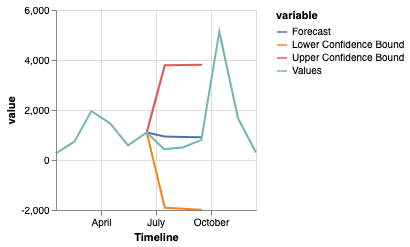

In [35]:
df34 = load_input_table("034.json")

display(df34)

df34 = pd.melt(df34, id_vars="Timeline", 
               value_vars=["Forecast", "Lower Confidence Bound", 
                           "Upper Confidence Bound", "Values"])
display(df34)

df34 = df34[df34["value"] != ""]

display(df34)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "x": { "field": "Timeline", "type": "temporal"},
        "color": {"field": "variable", 'type': "nominal"},
        "y": {"field": "value", 'type': "quantitative"}
    }
}

VegaLite(spec, df34)

DATA  Lower  Upper  Value
0    A     80    116    100
1    B    103    138    120
2    C    106    157    140
3    D     75     85     80
4    E     85    102     90

DATA variable  value
0     A    Lower     80
1     B    Lower    103
2     C    Lower    106
3     D    Lower     75
4     E    Lower     85
..  ...      ...    ...
10    A    Value    100
11    B    Value    120
12    C    Value    140
13    D    Value     80
14    E    Value     90

[15 rows x 3 columns]

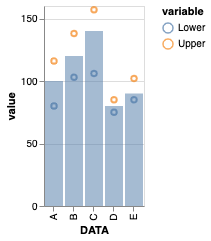

In [36]:
df35 = load_input_table("035.json")

display(df35)

df35 = pd.melt(df35, id_vars=["DATA"], value_vars=["Lower", "Upper", "Value"])

display(df35)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
          "mark": {"type": "bar", "opacity": 0.5},
          "transform": [{"filter": "datum.variable == \"Value\""}],
          "encoding": { "x": {"field": "DATA", "type": "nominal"},
                        "y": { "field": "value", "type": "quantitative" }}
        },
        {
          "mark": {"type": "point"},
          "transform": [{"filter": "datum.variable != \"Value\""}],
          "encoding": {
            "x": {"field": "DATA", "type": "nominal"},
            "y": {"field": "value", "type": "quantitative"},
            "color": {"field": "variable", "type": "nominal"}
          }
        }
    ]
}

VegaLite(spec, df35)

Close       Date  Volume
0     7210.770020   1-Jul-05   12600
1     7212.080078   4-Jul-05   13400
2     7271.540039  11-Jul-05   13200
3     7423.250000  18-Jul-05   12600
4     7635.419922  25-Jul-05   18100
..            ...        ...     ...
522  28092.789060  29-Jun-15   10300
523  27661.400390   6-Jul-15    9800
524  28463.310550  13-Jul-15    7300
525  28112.310550  20-Jul-15    9200
526  27459.230470  27-Jul-15   10600

[527 rows x 3 columns]

Close       Date  Volume  VolumeDiff
0     7210.770020   1-Jul-05   12600         NaN
1     7212.080078   4-Jul-05   13400       800.0
2     7271.540039  11-Jul-05   13200      -200.0
3     7423.250000  18-Jul-05   12600      -600.0
4     7635.419922  25-Jul-05   18100      5500.0
..            ...        ...     ...         ...
522  28092.789060  29-Jun-15   10300      1200.0
523  27661.400390   6-Jul-15    9800      -500.0
524  28463.310550  13-Jul-15    7300     -2500.0
525  28112.310550  20-Jul-15    9200      1900.0
526  27459.230470  27-Jul-15   10600      1400.0

[527 rows x 4 columns]

Close       Date    variable    value
0      7210.770020   1-Jul-05  VolumeDiff      NaN
1      7212.080078   4-Jul-05  VolumeDiff    800.0
2      7271.540039  11-Jul-05  VolumeDiff   -200.0
3      7423.250000  18-Jul-05  VolumeDiff   -600.0
4      7635.419922  25-Jul-05  VolumeDiff   5500.0
...            ...        ...         ...      ...
1049  28092.789060  29-Jun-15      Volume  10300.0
1050  27661.400390   6-Jul-15      Volume   9800.0
1051  28463.310550  13-Jul-15      Volume   7300.0
1052  28112.310550  20-Jul-15      Volume   9200.0
1053  27459.230470  27-Jul-15      Volume  10600.0

[1054 rows x 4 columns]

Close       Date    variable    value  color
0      7210.770020   1-Jul-05  VolumeDiff      NaN  False
1      7212.080078   4-Jul-05  VolumeDiff    800.0   True
2      7271.540039  11-Jul-05  VolumeDiff    200.0  False
3      7423.250000  18-Jul-05  VolumeDiff    600.0  False
4      7635.419922  25-Jul-05  VolumeDiff   5500.0   True
...            ...        ...         ...      ...    ...
1049  28092.789060  29-Jun-15      Volume  10300.0   True
1050  27661.400390   6-Jul-15      Volume   9800.0   True
1051  28463.310550  13-Jul-15      Volume   7300.0   True
1052  28112.310550  20-Jul-15      Volume   9200.0   True
1053  27459.230470  27-Jul-15      Volume  10600.0   True

[1054 rows x 5 columns]

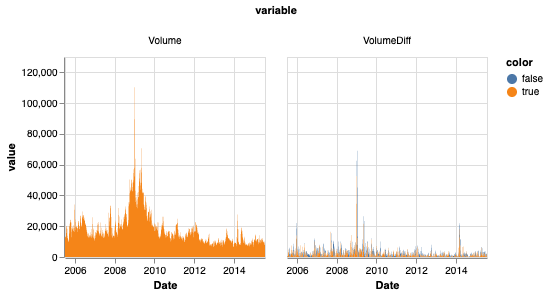

In [37]:
df36 = load_input_table("036.json")

display(df36)

df36["VolumeDiff"] = df36["Volume"].diff()

display(df36)

df36 = pd.melt(df36, id_vars=["Close", "Date"], value_vars=["VolumeDiff", "Volume"])

display(df36)

df36["color"] = df36['value'] > 0
df36["value"] = df36["value"].abs()

display(df36)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
      "mark": "area",
      "encoding": {
        "x": {"field": "Date", "type": "temporal"},
        "y": {"field": "value", "type": "quantitative"},
        "color": {"field": "color", "type": "nominal"},
        "column": {"field": "variable", "type": "nominal" }
      }
}

VegaLite(spec, df36)

<-10%  <0%  >10%  >=0%                     Category  TOTAL
0    194  139   181   131              HOME APPLIANCES    645
1    174  118   173   103                    COMPUTERS    568
2    110   94    83    68         CAMERAS & CAMCORDERS    355
3     80   63    69    53                  CELL PHONES    265
4     62   45    56    42                   TV & VIDEO    205
5     65   34    42    25                 GAMES & TOYS    166
6     34   19    34    13                        AUDIO    100
7     15   26    29    20  MUSIC, MOVIES & AUDIO BOOKS     90

TOTAL                     Category variable  value
0     645              HOME APPLIANCES    <-10%    194
1     568                    COMPUTERS    <-10%    174
2     355         CAMERAS & CAMCORDERS    <-10%    110
3     265                  CELL PHONES    <-10%     80
4     205                   TV & VIDEO    <-10%     62
..    ...                          ...      ...    ...
27    265                  CELL PHONES     >=0%     53
28    205                   TV & VIDEO     >=0%     42
29    166                 GAMES & TOYS     >=0%     25
30    100                        AUDIO     >=0%     13
31     90  MUSIC, MOVIES & AUDIO BOOKS     >=0%     20

[32 rows x 4 columns]

TOTAL                     Category variable  value
0     645              HOME APPLIANCES    <-10%    451
1     568                    COMPUTERS    <-10%    394
2     355         CAMERAS & CAMCORDERS    <-10%    245
3     265                  CELL PHONES    <-10%    185
4     205                   TV & VIDEO    <-10%    143
..    ...                          ...      ...    ...
27    265                  CELL PHONES     >=0%    212
28    205                   TV & VIDEO     >=0%    163
29    166                 GAMES & TOYS     >=0%    141
30    100                        AUDIO     >=0%     87
31     90  MUSIC, MOVIES & AUDIO BOOKS     >=0%     70

[32 rows x 4 columns]

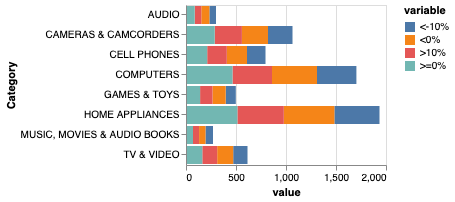

In [38]:
df37 = load_input_table("037.json")

display(df37)

df37 = pd.melt(df37, id_vars=["TOTAL", "Category"], value_vars=["<-10%", "<0%", ">10%", ">=0%"])

display(df37)

df37["value"] = df37["TOTAL"] - df37["value"]

display(df37)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar"},
    "encoding": {
        "color": {"field": "variable", "type": "nominal"},
        "y": {"field": "Category", "type": "nominal"},
        "x": { "field": "value", "type": "quantitative"}    
    }
}

VegaLite(spec, df37)

group1  group2  group3  group4  x
0      56      63      51      53  1
1      23      34      46      52  2
2      96      45      63      74  3
3      24      36      33      95  4
4      75      47      33      46  5
5      67      43      34      78  6
6      42      51      83      55  7
7      45      94      40      41  8

x variable  value
0   1   group1     56
1   2   group1     23
2   3   group1     96
3   4   group1     24
4   5   group1     75
.. ..      ...    ...
27  4   group4     95
28  5   group4     46
29  6   group4     78
30  7   group4     55
31  8   group4     41

[32 rows x 3 columns]

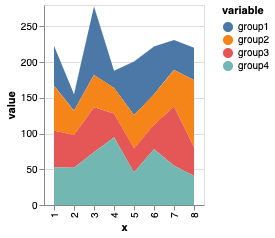

In [39]:
df38 = load_input_table("038.json")

display(df38)

df38 = pd.melt(df38, id_vars=["x"], value_vars=["group1", "group2", "group3", "group4"])

display(df38)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "area"
  },
  "encoding": {
    "x": {"field": "x","type": "ordinal"},
    "y": { "field": "value", "type": "quantitative" },
    "color": { "field": "variable", "type": "nominal" }
  }
}

VegaLite(spec, df38)

NORTH-Bisc  NORTH-Choc  SOUTH-Bisc  SOUTH-Choc  WEST-Bisc  WEST-Choc  Year
0         6.0          14         4.0          10        4.0          6  2007
1         6.7          18         5.0          11        5.0         10  2008
2         7.0          19         5.7          14        5.7         12  2009
3         8.0          21         6.0          16        6.0         15  2010

Year    variable  value
0   2007  NORTH-Bisc    6.0
1   2008  NORTH-Bisc    6.7
2   2009  NORTH-Bisc    7.0
3   2010  NORTH-Bisc    8.0
4   2007  NORTH-Choc   14.0
..   ...         ...    ...
19  2010   WEST-Bisc    6.0
20  2007   WEST-Choc    6.0
21  2008   WEST-Choc   10.0
22  2009   WEST-Choc   12.0
23  2010   WEST-Choc   15.0

[24 rows x 3 columns]

Year    variable  value    loc  type
0   2007  NORTH-Bisc    6.0  NORTH  Bisc
1   2008  NORTH-Bisc    6.7  NORTH  Bisc
2   2009  NORTH-Bisc    7.0  NORTH  Bisc
3   2010  NORTH-Bisc    8.0  NORTH  Bisc
4   2007  NORTH-Choc   14.0  NORTH  Choc
..   ...         ...    ...    ...   ...
19  2010   WEST-Bisc    6.0   WEST  Bisc
20  2007   WEST-Choc    6.0   WEST  Choc
21  2008   WEST-Choc   10.0   WEST  Choc
22  2009   WEST-Choc   12.0   WEST  Choc
23  2010   WEST-Choc   15.0   WEST  Choc

[24 rows x 5 columns]

Year    loc  Bisc  Choc
0   2007  NORTH   6.0  14.0
1   2007  SOUTH   4.0  10.0
2   2007   WEST   4.0   6.0
3   2008  NORTH   6.7  18.0
4   2008  SOUTH   5.0  11.0
..   ...    ...   ...   ...
7   2009  SOUTH   5.7  14.0
8   2009   WEST   5.7  12.0
9   2010  NORTH   8.0  21.0
10  2010  SOUTH   6.0  16.0
11  2010   WEST   6.0  15.0

[12 rows x 4 columns]

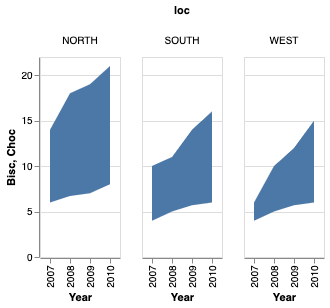

In [40]:
df39 = load_input_table("039.json")

display(df39)

df39 = pd.melt(df39, id_vars=["Year"], 
               value_vars=["NORTH-Bisc", "NORTH-Choc", "SOUTH-Bisc", 
                           "SOUTH-Choc", "WEST-Bisc", "WEST-Choc"])

display(df39)

split_col = df39["variable"].str.split("-", expand=True)
df39["loc"] = split_col[0]
df39["type"] = split_col[1]

display(df39)

df39 = df39.pivot_table(index=["Year", "loc"], columns='type', values=['value']).reset_index()
df39.columns = ["Year", "loc", "Bisc", "Choc"]

display(df39)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "area"
  },
  "encoding": {
    "x": {"field": "Year","type": "ordinal"},
    "y": { "field": "Bisc", "type": "quantitative" },
    "y2": { "field": "Choc", "type": "quantitative" },
    "column": { "field": "loc", "type": "nominal" }
  }
}

VegaLite(spec, df39)

Value Win / Loss  id
0      10        Win   0
1       2       Loss   1
2      12        Win   2
3       4       Loss   3
4       5        Win   4
..    ...        ...  ..
8      12        Win   8
9       3       Loss   9
10      4        Win  10
11      4       Loss  11
12      1        Win  12

[13 rows x 3 columns]

Value Win / Loss  id  end  start
0      10        Win   0   10      0
1       2       Loss   1   12     10
2      12        Win   2   24     12
3       4       Loss   3   28     24
4       5        Win   4   33     28
..    ...        ...  ..  ...    ...
8      12        Win   8   88     76
9       3       Loss   9   91     88
10      4        Win  10   95     91
11      4       Loss  11   99     95
12      1        Win  12  100     99

[13 rows x 5 columns]

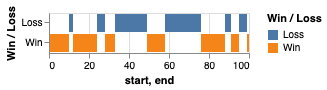

In [41]:
df40 = load_input_table("040.json")

display(df40)

df40["end"] = df40["Value"].cumsum()
df40["start"] = df40["end"] - df40["Value"]

display(df40)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "bar"
  },
  "encoding": {
    "x": {"field": "start","type": "quantitative"},
    "x2": {"field": "end","type": "quantitative"},
    "color": { "field": "Win / Loss", "type": "nominal" },
    "y": { "field": "Win / Loss", "type": "nominal" }
  }
}

VegaLite(spec, df40)

Cod  Crustaceans   Herring  Scorpion.fishes      Tuna  Year
0  2716706     58578630  87161396         15250015  69690537  1950
1  3861166     59194582  51215349         15454659  34829755  1951
2  4396174     47562941  13962479         12541484  31061481  1952
3  3901176     68432658  13229061          9524564  23225423  1953
4  4412721     64395489  25285539          9890656  20798126  1954
5  4774045     76111004  18910756          8446391  13992697  1955

Year variable     value
0   1950      Cod   2716706
1   1951      Cod   3861166
2   1952      Cod   4396174
3   1953      Cod   3901176
4   1954      Cod   4412721
..   ...      ...       ...
25  1951     Tuna  34829755
26  1952     Tuna  31061481
27  1953     Tuna  23225423
28  1954     Tuna  20798126
29  1955     Tuna  13992697

[30 rows x 3 columns]

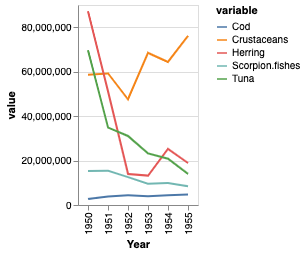

In [42]:
df41 = load_input_table("041.json")

display(df41)

df41 = pd.melt(df41, id_vars='Year', value_vars=["Cod", "Crustaceans", "Herring", "Scorpion.fishes", "Tuna"])

display(df41)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "line"
  },
  "encoding": {
    "x": {"field": "Year", "type": "ordinal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

VegaLite(spec, df41)

date      var0      var1
0   2002-01-01  100.0000  150.0000
1   2002-02-01   87.6560  158.5030
2   2002-03-01   78.7880  153.6914
3   2002-04-01   64.8441  154.0754
4   2002-05-01   83.3027  146.8448
..         ...       ...       ...
95  2009-12-01  212.8954  167.6651
96  2010-01-01  196.6905  157.8813
97  2010-02-01  183.1729  162.9670
98  2010-03-01  178.0592  159.8805
99  2010-04-01  175.4985  159.3445

[100 rows x 3 columns]

date variable     value
0    2002-01-01     var0  100.0000
1    2002-02-01     var0   87.6560
2    2002-03-01     var0   78.7880
3    2002-04-01     var0   64.8441
4    2002-05-01     var0   83.3027
..          ...      ...       ...
195  2009-12-01     var1  167.6651
196  2010-01-01     var1  157.8813
197  2010-02-01     var1  162.9670
198  2010-03-01     var1  159.8805
199  2010-04-01     var1  159.3445

[200 rows x 3 columns]

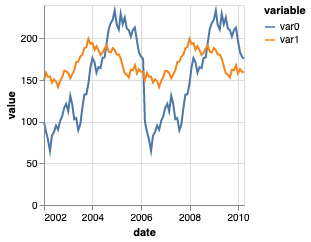

In [43]:
df42 = load_input_table("042.json")

display(df42)

df42 = pd.melt(df42, id_vars='date', value_vars=["var0", "var1"])

display(df42)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "line"
  },
  "encoding": {
    "x": {"field": "date", "type": "temporal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

VegaLite(spec, df42)

carat clarity color        cut  depth  price  table     x     y     z
0    0.94    VVS1     G      Ideal   62.4   6488   58.0  6.22  6.27  3.90
1    0.30    VVS1     F      Ideal   62.5    814   57.0  4.26  4.29  2.67
2    1.01     VS2     G    Premium   62.4   5999   58.0  6.38  6.41  3.99
3    0.39     VS2     G      Ideal   62.2    787   53.9  4.66  4.69  2.90
4    1.05     SI2     E  Very Good   62.2   3816   59.0  6.44  6.51  4.03
..    ...     ...   ...        ...    ...    ...    ...   ...   ...   ...
95   0.30     SI1     F      Ideal   61.9    475   57.0  4.31  4.35  2.68
96   0.32    VVS1     E      Ideal   61.5   1140   56.0  4.43  4.45  2.73
97   0.31     VS2     F    Premium   60.8    625   60.0  4.34  4.37  2.65
98   0.25    VVS2     E  Very Good   63.4    575   58.0  3.97  4.01  2.53
99   0.51     VS1     G      Ideal   61.6   1662   56.0  5.18  5.15  3.18

[100 rows x 10 columns]

depth  price  table     x     y     z  carat variable      value
0     62.4   6488   58.0  6.22  6.27  3.90   0.94  clarity       VVS1
1     62.5    814   57.0  4.26  4.29  2.67   0.30  clarity       VVS1
2     62.4   5999   58.0  6.38  6.41  3.99   1.01  clarity        VS2
3     62.2    787   53.9  4.66  4.69  2.90   0.39  clarity        VS2
4     62.2   3816   59.0  6.44  6.51  4.03   1.05  clarity        SI2
..     ...    ...    ...   ...   ...   ...    ...      ...        ...
295   61.9    475   57.0  4.31  4.35  2.68   0.30      cut      Ideal
296   61.5   1140   56.0  4.43  4.45  2.73   0.32      cut      Ideal
297   60.8    625   60.0  4.34  4.37  2.65   0.31      cut    Premium
298   63.4    575   58.0  3.97  4.01  2.53   0.25      cut  Very Good
299   61.6   1662   56.0  5.18  5.15  3.18   0.51      cut      Ideal

[300 rows x 9 columns]

variable      value  depth  price  table   x   y   z  carat
0   clarity         I1      3      3      3   3   3   3      3
1   clarity         IF      1      1      1   1   1   1      1
2   clarity        SI1     19     19     19  19  19  19     19
3   clarity        SI2     25     25     25  25  25  25     25
4   clarity        VS1     10     10     10  10  10  10     10
..      ...        ...    ...    ...    ...  ..  ..  ..    ...
15      cut       Fair      3      3      3   3   3   3      3
16      cut       Good      9      9      9   9   9   9      9
17      cut      Ideal     45     45     45  45  45  45     45
18      cut    Premium     18     18     18  18  18  18     18
19      cut  Very Good     25     25     25  25  25  25     25

[20 rows x 9 columns]

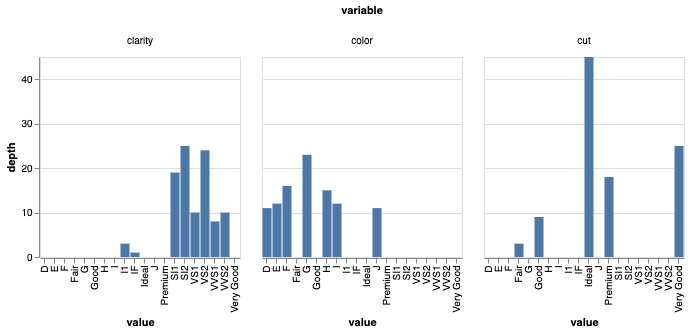

In [44]:
df43 = load_input_table("043.json")

display(df43)

df43 = pd.melt(df43, id_vars=["depth", "price", "table", "x", "y", "z", "carat"], 
               value_vars=["clarity", "color", "cut"])

display(df43)

df43 = df43.groupby(['variable', "value"]).count().reset_index()

display(df43)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {
        "type": "bar"
    },
    "width": 200,
    "encoding": {
        "x": {"field": "value", "type": "nominal"},
        "column": { "field": "variable", "type": "nominal" },
        "y": { "field": "depth", "type": "quantitative" }
    }
}

VegaLite(spec, df43)

Petal.Length  Petal.Width  Sepal.Length  Sepal.Width    Species
0              14            2            51           35     setosa
1              14            2            49            3     setosa
2              13            2            47           32     setosa
3              15            2            46           31     setosa
4              14            2             5           36     setosa
..            ...          ...           ...          ...        ...
145            52           23            67            3  virginica
146             5           19            63           25  virginica
147            52            2            65            3  virginica
148            54           23            62           34  virginica
149            51           18            59            3  virginica

[150 rows x 5 columns]

Species      variable  value
0       setosa  Petal.Length     14
1       setosa  Petal.Length     14
2       setosa  Petal.Length     13
3       setosa  Petal.Length     15
4       setosa  Petal.Length     14
..         ...           ...    ...
595  virginica   Sepal.Width      3
596  virginica   Sepal.Width     25
597  virginica   Sepal.Width      3
598  virginica   Sepal.Width     34
599  virginica   Sepal.Width      3

[600 rows x 3 columns]

Species      variable  value
0       setosa  Petal.Length    722
1       setosa   Petal.Width    123
2       setosa  Sepal.Length   2143
3       setosa   Sepal.Width   1516
4   versicolor  Petal.Length   1878
..         ...           ...    ...
7   versicolor   Sepal.Width   1151
8    virginica  Petal.Length   2533
9    virginica   Petal.Width    905
10   virginica  Sepal.Length   3186
11   virginica   Sepal.Width   1163

[12 rows x 3 columns]

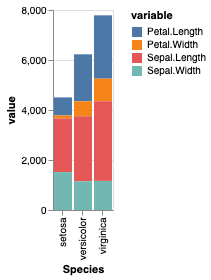

In [45]:
df44 = load_input_table("044.json")

display(df44)

df44 = pd.melt(df44, id_vars=["Species"], value_vars=["Petal.Length","Petal.Width","Sepal.Length","Sepal.Width"])

display(df44)

df44 = df44.groupby(['Species', "variable"]).sum().reset_index()

display(df44)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "bar"
  },
  "encoding": {
    "x": {"field": "Species", "type": "nominal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

VegaLite(spec, df44)

B1   B2   B3   B4             X1
0  5.1  3.5  1.4  7.1      Diversity
1  4.9  3.0  1.4  4.7   Endangerment
2  4.7  3.2  1.3  3.2  Marketability
3  4.6  3.1  1.5  5.1          Total

X1 variable  value
0       Diversity       B1    5.1
1    Endangerment       B1    4.9
2   Marketability       B1    4.7
3           Total       B1    4.6
4       Diversity       B2    3.5
..            ...      ...    ...
11          Total       B3    1.5
12      Diversity       B4    7.1
13   Endangerment       B4    4.7
14  Marketability       B4    3.2
15          Total       B4    5.1

[16 rows x 3 columns]

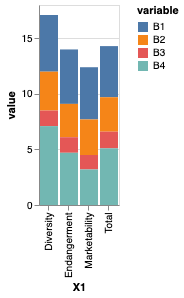

In [46]:
df45 = load_input_table("045.json")

display(df45)

df45 = pd.melt(df45, id_vars=["X1"], value_vars=["B1", "B2", "B3", "B4"])

display(df45)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": {
    "type": "bar"
  },
  "encoding": {
    "x": {"field": "X1", "type": "nominal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

VegaLite(spec, df45)

date      pce     pop  psavert  uempmed  unemploy
0   2012-07-01  11074.8  314449      6.6     17.5     12657
1   2001-09-01   7054.8  285843      6.3      7.2      7142
2   2011-08-01  10745.6  312355      6.2     22.4     13806
3   2005-07-01   8867.9  296186      1.9      8.8      7406
4   1989-05-01   3567.5  246906      7.6      5.3      6375
..         ...      ...     ...      ...      ...       ...
45  2001-06-01   7097.1  285062      3.7      6.0      6484
46  2007-10-01   9853.9  302807      2.8      8.4      7237
47  1981-04-01   1909.1  229403     10.3      7.4      7869
48  1984-08-01   2518.4  236549     11.2      7.3      8519
49  1974-10-01    961.0  214451     13.0      5.5      5523

[50 rows x 6 columns]

date      pce     pop  psavert  uempmed  unemploy    Y2K
0   2012-07-01  11074.8  314449      6.6     17.5     12657  False
1   2001-09-01   7054.8  285843      6.3      7.2      7142  False
2   2011-08-01  10745.6  312355      6.2     22.4     13806  False
3   2005-07-01   8867.9  296186      1.9      8.8      7406  False
4   1989-05-01   3567.5  246906      7.6      5.3      6375   True
..         ...      ...     ...      ...      ...       ...    ...
45  2001-06-01   7097.1  285062      3.7      6.0      6484  False
46  2007-10-01   9853.9  302807      2.8      8.4      7237  False
47  1981-04-01   1909.1  229403     10.3      7.4      7869   True
48  1984-08-01   2518.4  236549     11.2      7.3      8519   True
49  1974-10-01    961.0  214451     13.0      5.5      5523   True

[50 rows x 7 columns]

date    Y2K variable  value
0   2012-07-01  False  psavert    6.6
1   2001-09-01  False  psavert    6.3
2   2011-08-01  False  psavert    6.2
3   2005-07-01  False  psavert    1.9
4   1989-05-01   True  psavert    7.6
..         ...    ...      ...    ...
95  2001-06-01  False  uempmed    6.0
96  2007-10-01  False  uempmed    8.4
97  1981-04-01   True  uempmed    7.4
98  1984-08-01   True  uempmed    7.3
99  1974-10-01   True  uempmed    5.5

[100 rows x 4 columns]

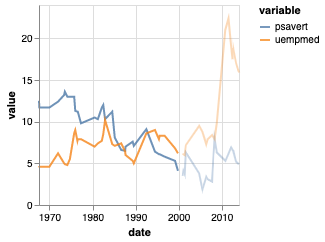

In [47]:
df46 = load_input_table("046.json")

display(df46)

df46["Y2K"] = pd.to_datetime(df46['date']).dt.year < 2000

display(df46)

df46 = pd.melt(df46, id_vars=["date", "Y2K"], value_vars=["psavert", "uempmed"])

display(df46)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "line" },
  "encoding": {
    "x": {"field": "date", "type": "temporal"},
    "color": { "field": "variable", "type": "nominal" },
    "strokeOpacity": { "field": "Y2K", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

VegaLite(spec, df46)

label   ok  total
0  Label1  0.0      1
1  Label2  0.5      1
2  Label3  0.4      1
3  Label4  0.9      1
4  Label5  0.4      1
5  Label6  0.9      1
6  Label7  0.8      1
7  Label8  0.8      1

label   ok  total  mutate_a
0  Label1  0.0      1       1.0
1  Label2  0.5      1       0.5
2  Label3  0.4      1       0.6
3  Label4  0.9      1       0.1
4  Label5  0.4      1       0.6
5  Label6  0.9      1       0.1
6  Label7  0.8      1       0.2
7  Label8  0.8      1       0.2

label  variable  value
0   Label1        ok    0.0
1   Label2        ok    0.5
2   Label3        ok    0.4
3   Label4        ok    0.9
4   Label5        ok    0.4
..     ...       ...    ...
11  Label4  mutate_a    0.1
12  Label5  mutate_a    0.6
13  Label6  mutate_a    0.1
14  Label7  mutate_a    0.2
15  Label8  mutate_a    0.2

[16 rows x 3 columns]

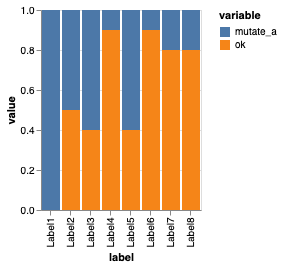

In [48]:
df47 = load_input_table("047.json")

display(df47)

df47["mutate_a"] = df47['total'] - df47['ok']

display(df47)

df47 = pd.melt(df47, id_vars=["label"], value_vars=["ok", "mutate_a"])

display(df47)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar" },
  "encoding": {
    "x": {"field": "label", "type": "nominal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

VegaLite(spec, df47)

A   B  C  ID category  totalABC
0   1   3  0  10   group1         4
1   1  11  1  11   group1        13
2  15  20  2  12   group2        37
3   6  12  2  13   group2        20
4  17  83  6  14   group2       106

category   A    B   C  ID  totalABC
0   group1   2   14   1  21        17
1   group2  38  115  10  39       163

category  totalABC variable  value
0   group1        17        A      2
1   group2       163        A     38
2   group1        17        B     14
3   group2       163        B    115
4   group1        17        C      1
5   group2       163        C     10

category  totalABC variable  value
0   group1        17        A     15
1   group2       163        A    125
2   group1        17        B      3
3   group2       163        B     48
4   group1        17        C     16
5   group2       163        C    153

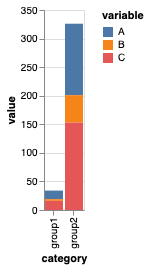

In [49]:
df48 = load_input_table("048.json")

display(df48)

df48 = df48.groupby("category").sum().reset_index()

display(df48)

df48 = pd.melt(df48, id_vars=["category", "totalABC"], value_vars=["A", "B", "C"])

display(df48)

df48["value"] = df48["totalABC"] - df48["value"]

display(df48)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar" },
  "encoding": {
    "x": {"field": "category", "type": "nominal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" }
  }
}

VegaLite(spec, df48)

scenario  value
0    measured_raw21_nodrain   55.0
1    measured_raw22_nodrain   60.0
2   simulated_raw21_nodrain   54.0
3      measured_raw21_drain   55.0
4      measured_raw22_drain   60.0
..                      ...    ...
19       measured_0.8_drain   55.0
20    simulated_0.5_nodrain   41.0
21    simulated_0.8_nodrain   56.0
22      simulated_0.5_drain   39.9
23      simulated_0.8_drain   55.3

[24 rows x 2 columns]

index                 scenario  value  scenario1    row    drain
0       0   measured_raw21_nodrain   55.0   measured  raw21  nodrain
1       1   measured_raw22_nodrain   60.0   measured  raw22  nodrain
2       2  simulated_raw21_nodrain   54.0  simulated  raw21  nodrain
3       3     measured_raw21_drain   55.0   measured  raw21    drain
4       4     measured_raw22_drain   60.0   measured  raw22    drain
..    ...                      ...    ...        ...    ...      ...
19     19       measured_0.8_drain   55.0   measured    0.8    drain
20     20    simulated_0.5_nodrain   41.0  simulated    0.5  nodrain
21     21    simulated_0.8_nodrain   56.0  simulated    0.8  nodrain
22     22      simulated_0.5_drain   39.9  simulated    0.5    drain
23     23      simulated_0.8_drain   55.3  simulated    0.8    drain

[24 rows x 6 columns]

scenario1    row    drain  measured  simulated
0            0.5    drain      40.0       39.9
1            0.5  nodrain      40.0       41.0
2            0.8    drain      55.0       55.3
3            0.8  nodrain      55.0       56.0
4          adj21    drain      23.0       23.4
..           ...      ...       ...        ...
7          adj22  nodrain      27.0       27.5
8          raw21    drain      55.0       54.5
9          raw21  nodrain      55.0       54.0
10         raw22    drain      60.0       60.2
11         raw22  nodrain      60.0       59.0

[12 rows x 4 columns]

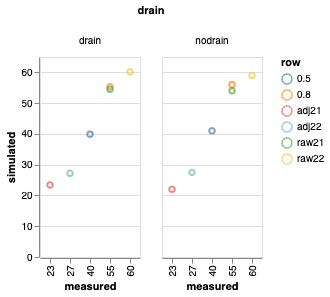

In [50]:
df49 = load_input_table("049.json")

display(df49)

splits = pd.DataFrame(df49["scenario"].str.split('_', 2).tolist(), columns = ['scenario1','row', "drain"])
df49 = pd.concat([df49, splits], axis=1).reset_index()

display(df49)

df49 = df49.pivot_table(index=["row", "drain"], columns='scenario1', values='value').reset_index()

display(df49)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "point" },
  "encoding": {
    "x": {"field": "measured", "type": "nominal"},
    "color": { "field": "row", "type": "nominal" },
    "y": { "field": "simulated", "type": "quantitative" },
    "column": { "field": "drain", "type": "nominal" }
  }
}

VegaLite(spec, df49)

Consuntivo 2010  Consuntivo 2011  Obiettivo 2011  id
0             42560            64146         51072.0   0
1             46368            74043         64915.2   1
2             46826           110358         65556.4   2
3             53090           132409         74326.0   3
4             60331           162675         84463.4   4
..              ...              ...             ...  ..
7             73102           188505        102342.8   7
8             80000           204907        112000.0   8
9             83922           212013        117490.8   9
10            86729           221144        121420.6  10
11            88889           221709        124444.6  11

[12 rows x 4 columns]

id         variable     value
0    0  Consuntivo 2010   42560.0
1    1  Consuntivo 2010   46368.0
2    2  Consuntivo 2010   46826.0
3    3  Consuntivo 2010   53090.0
4    4  Consuntivo 2010   60331.0
..  ..              ...       ...
31   7   Obiettivo 2011  102342.8
32   8   Obiettivo 2011  112000.0
33   9   Obiettivo 2011  117490.8
34  10   Obiettivo 2011  121420.6
35  11   Obiettivo 2011  124444.6

[36 rows x 3 columns]

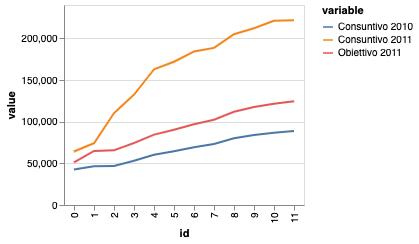

In [51]:
df50 = load_input_table("050.json")

display(df50)

df50 = pd.melt(df50, id_vars='id', value_vars=["Consuntivo 2010", "Consuntivo 2011", "Obiettivo 2011"])

display(df50)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "line" },
  "encoding": {
    "x": {"field": "id", "type": "ordinal"},
    "color": { "field": "variable", "type": "nominal" },
    "y": { "field": "value", "type": "quantitative" },
  }
}

VegaLite(spec, df50)

Condition Feature Sex  value
0           1       A   M      6
1           2       A   M      4
2           3       A   M     10
3           1    Aneg   M      1
4           2    Aneg   M      2
..        ...     ...  ..    ...
7           2       A   F      3
8           3       A   F      4
9           1    Aneg   F      5
10          2    Aneg   F      6
11          3    Aneg   F      9

[12 rows x 4 columns]

Feature  Condition Sex   A  Aneg
0                1   F   2     5
1                1   M   6     1
2                2   F   3     6
3                2   M   4     2
4                3   F   4     9
5                3   M  10     6

Feature  Condition Sex   A  Aneg   p
0                1   F   2     5   7
1                1   M   6     1   7
2                2   F   3     6   9
3                2   M   4     2   6
4                3   F   4     9  13
5                3   M  10     6  16

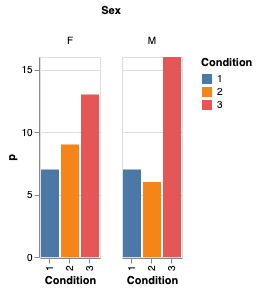

In [52]:
df51 = load_input_table("051.json")

display(df51)

df51 = df51.pivot_table(index=["Condition", "Sex"], columns='Feature', values='value').reset_index()

display(df51)

df51["p"] =  (df51["A"] + df51["Aneg"])

display(df51)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar"},
  "encoding": {
    "x": {"field": "Condition", "type": "nominal"},
    "color": { "field": "Condition", "type": "nominal" },
    "y": { "field": "p", "type": "quantitative" },
    "column": { "field": "Sex", "type": "nominal" }
  }
}

VegaLite(spec, df51)

Label  bar 0  bar 1  bar 2  bar 3
0    Label_1    100     77     21     20
1    Label_2    114     94     38     17
2    Label_3    151     79     31     26
3    Label_4    175     87     30     16
4    Label_5    178     51     20     29
..       ...    ...    ...    ...    ...
7    Label_8    140    100     34     26
8    Label_9    119     84     24     25
9   Label_10    113     92     30     21
10  Label_11    179     61     20     23
11  Label_12    143     74     26     28

[12 rows x 5 columns]

Label variable  value
0    Label_1    bar 0    100
1    Label_2    bar 0    114
2    Label_3    bar 0    151
3    Label_4    bar 0    175
4    Label_5    bar 0    178
..       ...      ...    ...
43   Label_8    bar 3     26
44   Label_9    bar 3     25
45  Label_10    bar 3     21
46  Label_11    bar 3     23
47  Label_12    bar 3     28

[48 rows x 3 columns]

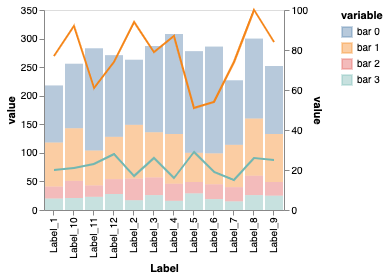

In [53]:
df52 = load_input_table("052.json")

display(df52)

df52 = pd.melt(df52, id_vars=["Label"], value_vars=["bar 0", "bar 1", "bar 2", "bar 3"])

display(df52)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Label", "type": "nominal" },
                "color": { "field": "variable", "type": "nominal" }
            }
        }, 
        {
            "mark": {"type": "line"},
            "transform": [{"filter": "datum.variable == \"bar 1\" || datum.variable == \"bar 3\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Label", "type": "nominal" },
                "color": { "field": "variable", "type": "nominal" }
            }
        }
  ],
  "resolve": {"scale": {"y": "independent"}}
}

VegaLite(spec, df52)

classes    date  score
0    french  9/1/11     34
1   english  9/1/11     34
2    french  9/1/11     34
3   spanish  9/1/11     34
4    french  9/2/11     34
..      ...     ...    ...
7   spanish  9/3/11     34
8   spanish  9/5/11     34
9   english  9/5/11     34
10   french  9/5/11     34
11  english  9/5/11     34

[12 rows x 3 columns]

classes    date  score
0  english  9/1/11      1
1  english  9/2/11      1
2  english  9/5/11      2
3   french  9/1/11      2
4   french  9/2/11      1
5   french  9/5/11      1
6  spanish  9/1/11      1
7  spanish  9/3/11      2
8  spanish  9/5/11      1

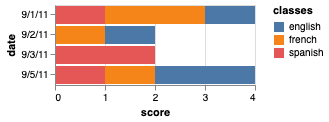

In [54]:
df53 = load_input_table("053.json")

display(df53)

df53 = df53.groupby(['classes', 'date']).count().reset_index()

display(df53)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar"},
  "encoding": {
    "y": {"field": "date", "type": "nominal"},
    "color": { "field": "classes", "type": "nominal" },
    "x": { "field": "score", "type": "quantitative" },
  }
}

VegaLite(spec, df53)

h  h_bar         x
0   102     76   Label_1
1   124     90   Label_2
2   126     76   Label_3
3   139     65   Label_4
4   177     65   Label_5
..  ...    ...       ...
7   138     50   Label_8
8   128     92   Label_9
9   102     91  Label_10
10  115     65  Label_11
11  144     79  Label_12

[12 rows x 3 columns]

h  h_bar         x   y2
0   102     76   Label_1  178
1   124     90   Label_2  214
2   126     76   Label_3  202
3   139     65   Label_4  204
4   177     65   Label_5  242
..  ...    ...       ...  ...
7   138     50   Label_8  188
8   128     92   Label_9  220
9   102     91  Label_10  193
10  115     65  Label_11  180
11  144     79  Label_12  223

[12 rows x 4 columns]

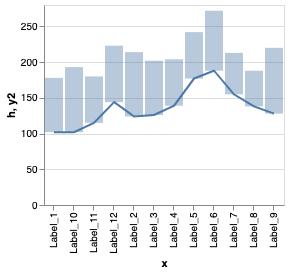

In [55]:
df54 = load_input_table("054.json")

display(df54)

df54["y2"] = df54["h_bar"] + df54["h"]

display(df54)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "encoding": {
                "y": {"field": "h", "type": "quantitative"},
                "x": { "field": "x", "type": "nominal" },
                "y2": { "field": "y2", "type": "nominal" }
            }
        }, 
        {
            "mark": {"type": "line"},
            "encoding": {
                "y": {"field": "h", "type": "quantitative"},
                "x": { "field": "x", "type": "nominal" }
            }
        }
  ],
  "resolve": {}
}

VegaLite(spec, df54)

group_measure id  value
0            a_c  A      2
1            a_c  B      2
2            a_c  C      3
3            a_c  D      5
4            b_c  A      2
..           ... ..    ...
11           a_d  D      1
12           b_d  A      4
13           b_d  B      2
14           b_d  C      4
15           b_d  D      3

[16 rows x 3 columns]

index group_measure id  value val1 val2
0       0           a_c  A      2    a    c
1       1           a_c  B      2    a    c
2       2           a_c  C      3    a    c
3       3           a_c  D      5    a    c
4       4           b_c  A      2    b    c
..    ...           ... ..    ...  ...  ...
11     11           a_d  D      1    a    d
12     12           b_d  A      4    b    d
13     13           b_d  B      2    b    d
14     14           b_d  C      4    b    d
15     15           b_d  D      3    b    d

[16 rows x 6 columns]

val1 id val2  a  b
0     A    c  2  2
1     A    d  4  4
2     B    c  2  5
3     B    d  1  2
4     C    c  3  5
5     C    d  2  4
6     D    c  5  4
7     D    d  1  3

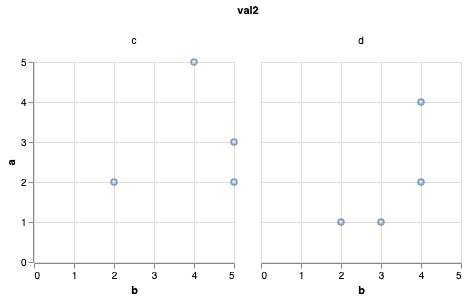

In [56]:
df55 = load_input_table("055.json")

display(df55)

splits = pd.DataFrame(df55["group_measure"].str.split('_', 1).tolist(), columns = ['val1',"val2"])
df55 = pd.concat([df55, splits], axis=1).reset_index()

display(df55)

df55 = df55.pivot_table(index=["id", "val2"], columns='val1', values='value').reset_index()

display(df55)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "point"},
  "encoding": {
    "y": {"field": "a", "type": "quantitative"},
    "x": { "field": "b", "type": "quantitative" },
    "column": { "field": "val2", "type": "nominal" },
  }
}

VegaLite(spec, df55)

02      03      04      05      06     07      08     09     10  \
0    36034   45632   59025   74767   50846  26688   16498  16272  20612   
1    63763   66505   52837   48210   37970  27830   26604  24485    713   
2    51432   60360   68571   70972   63896  17010   41201  14546  18114   
3    65100   36685   35788   67705   78296  54074   38417  74756  57872   
4    61444  107551   75262   85576   81216  26727   43709  28193  25684   
..     ...     ...     ...     ...     ...    ...     ...    ...    ...   
13  685995  578627  606794  533762   38642  33676  102067  89824   1520   
14  325569  424918  501805  375046  130879  20154   47771  37838  46044   
15  394893  336442  333508  483442  134422  33916   70210  93295  66312   
16   88586  156380  112263  136605  164913  25483   44783  20890  20971   
17  119206   80952  112676  160272  112949  24284   22790    998  20217   

        11 grp  time  
0    23549   A     1  
1      856   B     1  
2    32854   C     1  
3    42906   D     1  
4    33385   E     1  
..     ...  ..   ...  
13  100707   B    12  
14   53324   C    12  
15   63296   D    12  
16   24867   E    12  
17   21114   F    12  

[18 rows x 12 columns]

grp  time variable   value
0     A     1       02   36034
1     B     1       02   63763
2     C     1       02   51432
3     D     1       02   65100
4     E     1       02   61444
..   ..   ...      ...     ...
175   B    12       11  100707
176   C    12       11   53324
177   D    12       11   63296
178   E    12       11   24867
179   F    12       11   21114

[180 rows x 4 columns]

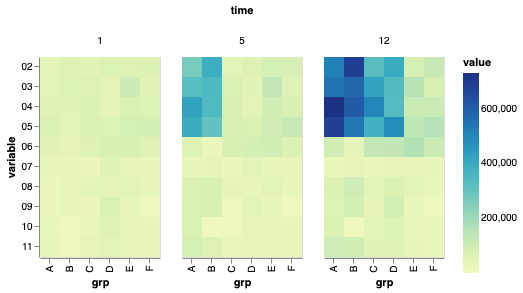

In [57]:
df56 = load_input_table("056.json")

display(df56)

df56 = pd.melt(df56, id_vars=["grp", "time"], 
               value_vars=["02", "03", "04", "05", "06", 
                           "07", "08", "09", "10", "11"])

display(df56)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "rect"},
  "encoding": {
    "y": {"field": "variable", "type": "nominal"},
    "x": { "field": "grp", "type": "nominal" },
    "column": { "field": "time", "type": "nominal" },
    "color": { "field": "value", "type": "quantitative" },
  }
}

VegaLite(spec, df56)

x_1  x_2  x_3  x_4    y_1   y_2    y_3    y_4
0    10   10   10    8   8.04  9.14   7.46   6.58
1     8    8    8    8   6.95  8.14   6.77   5.76
2    13   13   13    8   7.58  8.74  12.74   7.71
3     9    9    9    8   8.81  8.77   7.11   8.84
4    11   11   11    8   8.33  9.26   7.81   8.47
..  ...  ...  ...  ...    ...   ...    ...    ...
6     6    6    6    8   7.24  6.13   6.08   5.25
7     4    4    4   19   4.26  3.10   5.39  12.50
8    12   12   12    8  10.84  9.13   8.15   5.56
9     7    7    7    8   4.82  7.26   6.42   7.91
10    5    5    5    8   5.68  4.74   5.73   6.89

[11 rows x 8 columns]

variable  value
0       x_1  10.00
1       x_1   8.00
2       x_1  13.00
3       x_1   9.00
4       x_1  11.00
..      ...    ...
83      y_4   5.25
84      y_4  12.50
85      y_4   5.56
86      y_4   7.91
87      y_4   6.89

[88 rows x 2 columns]

index variable  value axis group
0       0      x_1  10.00    x     1
1       1      x_1   8.00    x     1
2       2      x_1  13.00    x     1
3       3      x_1   9.00    x     1
4       4      x_1  11.00    x     1
..    ...      ...    ...  ...   ...
83     83      y_4   5.25    y     4
84     84      y_4  12.50    y     4
85     85      y_4   5.56    y     4
86     86      y_4   7.91    y     4
87     87      y_4   6.89    y     4

[88 rows x 5 columns]

index variable  value axis group   g
0       0      x_1  10.00    x     1   0
1       1      x_1   8.00    x     1   1
2       2      x_1  13.00    x     1   2
3       3      x_1   9.00    x     1   3
4       4      x_1  11.00    x     1   4
..    ...      ...    ...  ...   ...  ..
83     83      y_4   5.25    y     4   6
84     84      y_4  12.50    y     4   7
85     85      y_4   5.56    y     4   8
86     86      y_4   7.91    y     4   9
87     87      y_4   6.89    y     4  10

[88 rows x 6 columns]

axis group   g     x      y
0        1   0  10.0   8.04
1        1   1   8.0   6.95
2        1   2  13.0   7.58
3        1   3   9.0   8.81
4        1   4  11.0   8.33
..     ...  ..   ...    ...
39       4   6   8.0   5.25
40       4   7  19.0  12.50
41       4   8   8.0   5.56
42       4   9   8.0   7.91
43       4  10   8.0   6.89

[44 rows x 4 columns]

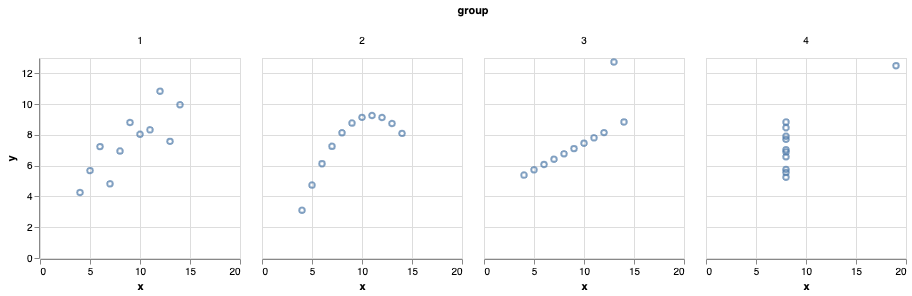

In [58]:
df57 = load_input_table("057.json")

display(df57)

df57 = pd.melt(df57, id_vars=[], value_vars=["x_1", "x_2", "x_3", "x_4", "y_1", "y_2", "y_3", "y_4"])

display(df57)

splits = pd.DataFrame(df57["variable"].str.split('_', 1).tolist(), columns = ['axis','group'])
df57 = pd.concat([df57, splits], axis=1).reset_index()

display(df57)

df57['g'] = df57.groupby(['axis', "group"])['axis'].cumcount()

display(df57)

df57 = df57.pivot_table(index=["group", "g"], columns='axis', values='value').reset_index()

display(df57)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "point"},
  "encoding": {
    "x": {"field": "x", "type": "quantitative"},
    "y": { "field": "y", "type": "quantitative" },
    "column": { "field": "group", "type": "nominal" }
  }
}

VegaLite(spec, df57)

count        date   retailer       type
0      12  04/17/2018  Retailer1  Completed
1      13  04/17/2018  Retailer1     Missed
2      10  04/17/2018  Retailer2  Completed
3      10  04/19/2018  Retailer1  Completed
4       1  04/19/2018  Retailer1     Missed
..    ...         ...        ...        ...
7       2  04/21/2018  Retailer1  Completed
8       1  04/21/2018  Retailer2  Completed
9       1  04/21/2018  Retailer1     Missed
10      2  04/23/2018  Retailer1  Completed
11      2  04/23/2018  Retailer2     Missed

[12 rows x 4 columns]

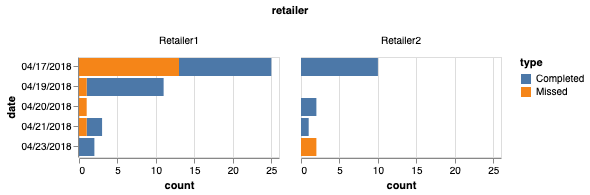

In [59]:
df58 = load_input_table("058.json")

display(df58)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "bar"},
  "encoding": {
    "x": {"field": "count", "type": "quantitative"},
    "y": { "field": "date", "type": "nominal" },
    "column": { "field": "retailer", "type": "nominal" },
    "color": { "field": "type", "type": "nominal" }
  }
}

VegaLite(spec, df58)

ID name  personsg1_0min  personsg1_10min  personsg1_30min  personsg2_0min  \
0  1    A               1                4                7              10   
1  2    A               2                5                8              11   
2  3    C               3                6                9              12   

   personsg2_10min  personsg2_30min  
0               13               16  
1               14               17  
2               15               18

name ID         variable  value
0     A  1   personsg1_0min      1
1     A  2   personsg1_0min      2
2     C  3   personsg1_0min      3
3     A  1  personsg1_10min      4
4     A  2  personsg1_10min      5
..  ... ..              ...    ...
13    A  2  personsg2_10min     14
14    C  3  personsg2_10min     15
15    A  1  personsg2_30min     16
16    A  2  personsg2_30min     17
17    C  3  personsg2_30min     18

[18 rows x 4 columns]

name ID         variable  value      group   time
0     A  1   personsg1_0min      1  personsg1   0min
1     A  2   personsg1_0min      2  personsg1   0min
2     C  3   personsg1_0min      3  personsg1   0min
3     A  1  personsg1_10min      4  personsg1  10min
4     A  2  personsg1_10min      5  personsg1  10min
..  ... ..              ...    ...        ...    ...
13    A  2  personsg2_10min     14  personsg2  10min
14    C  3  personsg2_10min     15  personsg2  10min
15    A  1  personsg2_30min     16  personsg2  30min
16    A  2  personsg2_30min     17  personsg2  30min
17    C  3  personsg2_30min     18  personsg2  30min

[18 rows x 6 columns]

group ID   time  personsg1  personsg2
0      1   0min          1         10
1      1  10min          4         13
2      1  30min          7         16
3      2   0min          2         11
4      2  10min          5         14
5      2  30min          8         17
6      3   0min          3         12
7      3  10min          6         15
8      3  30min          9         18

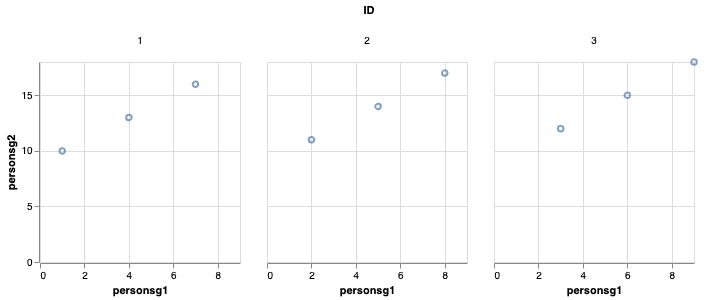

In [60]:
df59 = load_input_table("059.json")

display(df59)

df59 = pd.melt(df59, id_vars=["name", "ID"], 
                value_vars=["personsg1_0min", "personsg1_10min", 
                            "personsg1_30min", "personsg2_0min", 
                            "personsg2_10min", "personsg2_30min"])

display(df59)

split_col = df59["variable"].str.split("_", expand=True)
df59["group"] = split_col[0]
df59["time"] = split_col[1]

display(df59)

df59 = df59.pivot_table(index=["ID", "time"], columns='group', values='value').reset_index()

display(df59)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "point"},
  "encoding": {
    "x": {"field": "personsg1", "type": "quantitative"},
    "y": { "field": "personsg2", "type": "quantitative" },
    "column": { "field": "ID", "type": "nominal" }
  }
}

VegaLite(spec, df59)

fac   score
0   trial1  1.0355
1   trial1  1.4998
2   trial1  2.1847
3   trial1  1.0140
4   trial1  1.8388
..     ...     ...
15  trial2  4.4374
16  trial2  2.1362
17  trial2  2.5519
18  trial2  1.2056
19  trial2  2.6400

[20 rows x 2 columns]

fac   score  g
0   trial1  1.0355  0
1   trial1  1.4998  1
2   trial1  2.1847  2
3   trial1  1.0140  3
4   trial1  1.8388  4
..     ...     ... ..
15  trial2  4.4374  5
16  trial2  2.1362  6
17  trial2  2.5519  7
18  trial2  1.2056  8
19  trial2  2.6400  9

[20 rows x 3 columns]

fac  g  trial1  trial2
0    0  1.0355  1.7138
1    1  1.4998  2.6099
2    2  2.1847  4.3185
3    3  1.0140  2.8532
4    4  1.8388  3.2195
5    5  1.3549  4.4374
6    6  0.9128  2.1362
7    7  1.6856  2.5519
8    8  3.0877  1.2056
9    9  3.2488  2.6400

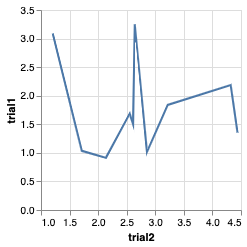

In [61]:
df60 = load_input_table("060.json")

display(df60)

df60['g'] = df60.groupby(['fac'])['score'].cumcount()

display(df60)

df60 = df60.pivot_table(index=["g"], columns='fac', values='score').reset_index()

display(df60)

spec = {
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "mark": { "type": "line"},
  "encoding": {
    "x": {"field": "trial2", "type": "quantitative"},
    "y": { "field": "trial1", "type": "quantitative" }
  }
}

VegaLite(spec, df60)

bar 0  bar 1  bar 2  bar 3         x
0     100     77     21     20   Label_1
1     114     94     38     17   Label_2
2     151     79     31     26   Label_3
3     175     87     30     16   Label_4
4     178     51     20     29   Label_5
..    ...    ...    ...    ...       ...
7     140    100     34     26   Label_8
8     119     84     24     25   Label_9
9     113     92     30     21  Label_10
10    179     61     20     23  Label_11
11    143     74     26     28  Label_12

[12 rows x 5 columns]

x variable  value
0    Label_1    bar 1     77
1    Label_2    bar 1     94
2    Label_3    bar 1     79
3    Label_4    bar 1     87
4    Label_5    bar 1     51
..       ...      ...    ...
43   Label_8    bar 0    140
44   Label_9    bar 0    119
45  Label_10    bar 0    113
46  Label_11    bar 0    179
47  Label_12    bar 0    143

[48 rows x 3 columns]

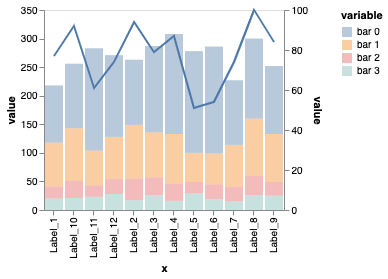

In [62]:
df_t1 = load_input_table("test_1.json")

display(df_t1)

df_t1 = pd.melt(df_t1, id_vars='x', value_vars=["bar 1","bar 2", "bar 3", "bar 0"])

display(df_t1)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "encoding": {
                "x": { "field": "x", "type": "nominal"},
                "color": { "field": "variable", "type": "nominal"},
                "y": { "field": "value", "type": "quantitative"}
            }
        },
        {
            "mark": {"type": "line"},
            "transform": [{"filter": "datum.variable == \"bar 1\""}],
            "encoding": {
                "y": {"type": "quantitative", "field": "value"},
                "x": { "field": "x", "type": "nominal" }
            }
        }
  ],
  "resolve": {"scale": {"y": "independent"}}
}

VegaLite(spec, df_t1)

1_1   1_10   1_11   1_12    1_2    1_3    1_4    1_5    1_6    1_7  \
0  0.306  0.263  0.286  0.295  0.331  0.327  0.320  0.295  0.301  0.277   
1  0.233  0.183  0.176  0.190  0.229  0.223  0.216  0.225  0.214  0.192   
2  0.185  0.184  0.180  0.189  0.181  0.176  0.185  0.196  0.180  0.164   
3  0.323  0.355  0.383  0.417  0.336  0.338  0.318  0.327  0.344  0.364   
4  0.329  0.300  0.291  0.288  0.342  0.334  0.311  0.332  0.309  0.315   
5  0.366  0.332  0.335  0.352  0.374  0.389  0.354  0.358  0.383  0.375   
6  0.086  0.080  0.084  0.080  0.084  0.081  0.077  0.075  0.068  0.073   
7  0.520  0.529  0.555  0.555  0.523  0.537  0.499  0.504  0.555  0.538   
8  0.477  0.468  0.487  0.482  0.488  0.494  0.524  0.576  0.524  0.503   

      ...        2_12    2_2    2_3    2_4    2_5    2_6    2_7    2_8    2_9  \
0     ...       0.436  0.325  0.334  0.344  0.355  0.365  0.376  0.388  0.399   
1     ...       0.307  0.252  0.257  0.262  0.267  0.273  0.278  0.284  0.289   
2     ...       0.058  0.167  0.150  0.135  0.121  0.109  0.098  0.088  0.080   
3     ...       0.307  0.307  0.307  0.307  0.307  0.307  0.307  0.307  0.307   
4     ...       0.672  0.341  0.365  0.391  0.418  0.448  0.479  0.512  0.548   
5     ...       0.496  0.407  0.415  0.423  0.432  0.440  0.449  0.458  0.467   
6     ...       0.026  0.075  0.068  0.061  0.055  0.049  0.044  0.040  0.036   
7     ...       0.792  0.589  0.607  0.625  0.644  0.663  0.683  0.703  0.725   
8     ...       0.491  0.491  0.491  0.491  0.491  0.491  0.491  0.491  0.491   

       Country  
0        Spain  
1       France  
2           US  
3       Greece  
4      Belgium  
5   Costa Rica  
6      Germany  
7  Switzerland  
8      Austria  

[9 rows x 25 columns]

Country variable  value
0          Spain      1_1  0.306
1         France      1_1  0.233
2             US      1_1  0.185
3         Greece      1_1  0.323
4        Belgium      1_1  0.329
..           ...      ...    ...
211      Belgium     2_12  0.672
212   Costa Rica     2_12  0.496
213      Germany     2_12  0.026
214  Switzerland     2_12  0.792
215      Austria     2_12  0.491

[216 rows x 3 columns]

Country variable  value l1  l2
0          Spain      1_1  0.306  1   1
1         France      1_1  0.233  1   1
2             US      1_1  0.185  1   1
3         Greece      1_1  0.323  1   1
4        Belgium      1_1  0.329  1   1
..           ...      ...    ... ..  ..
211      Belgium     2_12  0.672  2  12
212   Costa Rica     2_12  0.496  2  12
213      Germany     2_12  0.026  2  12
214  Switzerland     2_12  0.792  2  12
215      Austria     2_12  0.491  2  12

[216 rows x 5 columns]

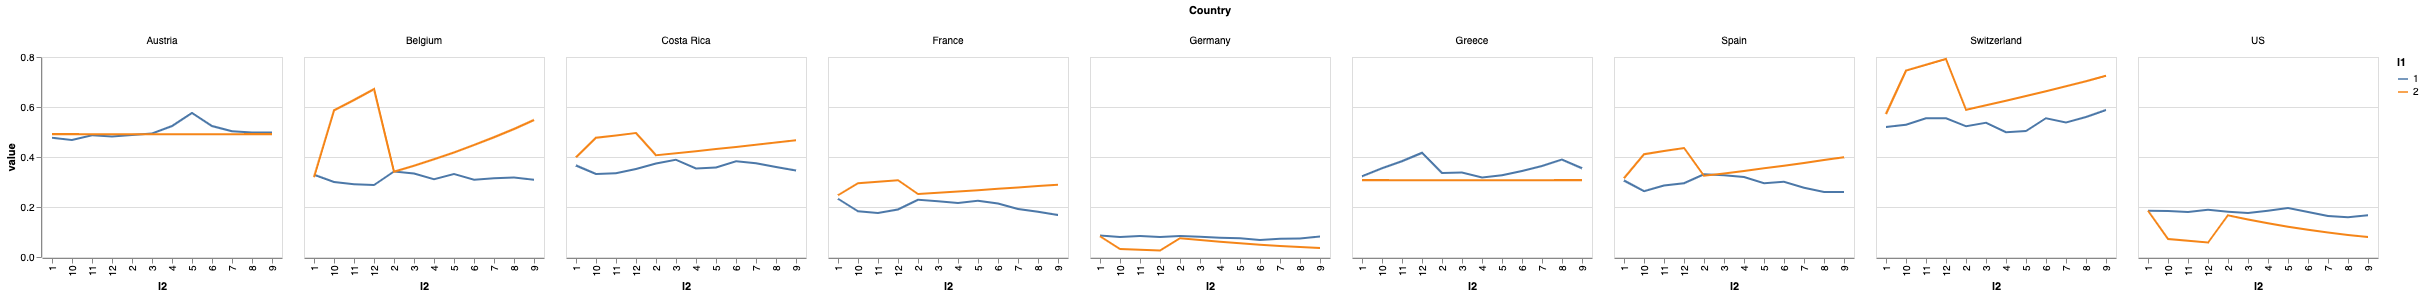

In [63]:
df_t2 = load_input_table("test_2.json")

display(df_t2)

df_t2 = pd.melt(df_t2, id_vars='Country', 
                value_vars=["1_1","1_2","1_3","1_4", "1_5","1_6","1_7","1_8",
                            "1_9","1_10", "1_11","1_12","2_1","2_2","2_3","2_4",
                            "2_5","2_6","2_7", "2_8","2_9", "2_10","2_11","2_12"])
display(df_t2)

split_col = df_t2["variable"].str.split("_", expand=True)
df_t2["l1"] = split_col[0]
df_t2["l2"] = split_col[1]
df_t2.reset_index()

display(df_t2)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "line",
    "encoding": {
        "x": { "field": "l2", "type": "nominal"},
        "color": { "field": "l1", "type": "nominal"},
        "y": { "field": "value", "type": "quantitative"},
        "column": {"field": "Country", "type": "nominal"}
    }
}

VegaLite(spec, df_t2)

data  id
0    16   0
1    14   1
2    12   2
3    13   3
4    12   4
5    16   5
6    18   6
7    17   7
8    12   8
9    18   9

data  id
0   16   0
1   14   1
2   12   2
3   13   3
4   12   4
5   16   5
6   18   6
7   17   7
8   12   8
9   18   9

data  id   diff
0   16   0  False
1   14   1  False
2   12   2  False
3   13   3   True
4   12   4  False
5   16   5   True
6   18   6   True
7   17   7  False
8   12   8  False
9   18   9   True

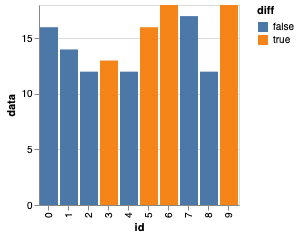

In [64]:
df_t3 = load_input_table("test_3.json")

display(df_t3)

df_t3["data"] = [str(d) for d in df_t3["data"]]
df_t3["id"] = [int(x) for x in df_t3.index]

display(df_t3)

df_t3["diff"] = df_t3["data"] > df_t3["data"].shift(1)

display(df_t3)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "id", "type": "nominal"},
        "color": { "field": "diff", "type": "nominal"},
        "y": { "field": "data", "type": "quantitative"},
        "order": {"field": "id"}
    }
}

VegaLite(spec, df_t3)

APPRENTICE  CLERICAL  ENGINEERING SPECIALIST  MAJOR EXECUTIVE  \
0         8.8      14.7                    13.2             22.0   
1         4.2       9.7                    16.6             29.2   
2         1.0       0.0                    14.3             43.0   
3         1.0       0.0                     9.0             51.0   
4         0.0       0.0                    10.7             57.0   
5         0.0       0.0                    10.9             65.0   
6         0.0       0.0                     7.1             67.0   
7         0.0       0.0                     2.8             75.0   
8         0.0       0.0                     4.5             77.0   
9         0.0       0.0                     5.6             88.8   

   MINOR EXECUTIVE  MISC.  NO CLASS  Period  SALESMAN  SKILLED LABOR  
0             16.0    1.9       5.9       1       5.1           11.8  
1             25.0    0.0       4.2       2       5.5            5.5  
2             30.4    0.0       4.2       3       5.5            1.6  
3             28.8    0.7       4.0       4       5.5            0.0  
4             21.4    1.9       1.8       5       7.2            0.0  
5             13.2    1.8       2.8       6       6.6            0.0  
6             14.1    4.4       2.4       7       4.4            0.0  
7             11.2    5.6       2.8       8       2.4            0.0  
8              9.0    4.5       0.0       9       4.5            0.0  
9              0.0    0.0       0.0      10       5.6            0.0

Period    variable  value
0        1  APPRENTICE    8.8
1        2  APPRENTICE    4.2
2        3  APPRENTICE    1.0
3        4  APPRENTICE    1.0
4        5  APPRENTICE    0.0
..     ...         ...    ...
85       6       MISC.    1.8
86       7       MISC.    4.4
87       8       MISC.    5.6
88       9       MISC.    4.5
89      10       MISC.    0.0

[90 rows x 3 columns]

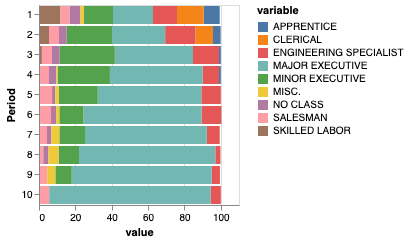

In [65]:
df_t4 = load_input_table("test_4.json")

display(df_t4)

df_t4 = pd.melt(df_t4, id_vars='Period', 
                value_vars=["APPRENTICE","CLERICAL","ENGINEERING SPECIALIST",
                            "MAJOR EXECUTIVE","SKILLED LABOR","MINOR EXECUTIVE",
                            "SALESMAN","NO CLASS","MISC."])

display(df_t4)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": "bar",
    "encoding": {
        "x": { "field": "value", "type": "quantitative"},
        "color": { "field": "variable", "type": "nominal"},
        "y": { "field": "Period", "type": "nominal"}
    }
}

VegaLite(spec, df_t4)

cat 1  cat 2  cat 3  cat 4  cat 5  cat 6  id
0   49554  19837  19890  36555  37865  44323   1
1   15787   5987   7989  14989   3425  43421   2
2    2525   1214   7762   5647   3321  21010   3
3    1678   1226   5643   3968 -10210   9875   4
4    1514    542   4991   1987 -13289   7674   5
..    ...    ...    ...    ...    ...    ...  ..
7    -331      0  -3711    698      0    453   8
8   -7652      0      0    124      0    411   9
9  -11234      0      0   -408      0  -7674  10
10 -18214      0      0  -6564      0  -8723  11
11      0      0      0 -12268      0 -32111  12

[12 rows x 7 columns]

id variable  value
0    1    cat 1  49554
1    2    cat 1  15787
2    3    cat 1   2525
3    4    cat 1   1678
4    5    cat 1   1514
..  ..      ...    ...
67   8    cat 6    453
68   9    cat 6    411
69  10    cat 6  -7674
70  11    cat 6  -8723
71  12    cat 6 -32111

[72 rows x 3 columns]

id variable  value
0    1    cat 1  49554
1    2    cat 1  15787
2    3    cat 1   2525
3    4    cat 1   1678
4    5    cat 1   1514
..  ..      ...    ...
67   8    cat 6    453
68   9    cat 6    411
69  10    cat 6  -7674
70  11    cat 6  -8723
71  12    cat 6 -32111

[72 rows x 3 columns]

id variable  value
0    1    cat 1  49554
1    2    cat 1  15787
2    3    cat 1   2525
3    4    cat 1   1678
4    5    cat 1   1514
..  ..      ...    ...
7    8      sum  -2891
8    9      sum  -7117
9   10      sum -19316
10  11      sum -33501
11  12      sum -44379

[84 rows x 3 columns]

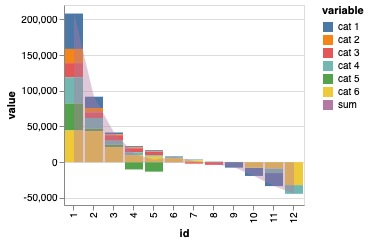

In [66]:
df_t5 = load_input_table("test_5.json")

display(df_t5)

df_t5 = pd.melt(df_t5, id_vars='id', value_vars=["cat 1", "cat 2", "cat 3", "cat 4", "cat 5", "cat 6"])

display(df_t5)

df_t5_1 = df_t5.groupby(['id'])["value"].sum().reset_index()

display(df_t5)

df_t5 = pd.concat([df_t5, df_t5_1], sort=False)
df_t5 = df_t5.fillna("sum")

display(df_t5)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"type": "bar"},
            "transform": [{"filter": "datum.variable != \"sum\""}],
            "encoding": {
                "y": { "field": "value", "type": "quantitative"},
                "color": { "field": "variable", "type": "nominal"},
                "x": { "field": "id", "type": "nominal"}
            }
        },
        {
            "mark": {"opacity": 0.4, "type": "area"},
            "transform": [{"filter": "datum.variable == \"sum\""}],
            "encoding": {
                "y": {"type": "quantitative", "field": "value"},
                "color": { "field": "variable", "type": "nominal"},
                "x": { "field": "id", "type": "nominal" }
            }
        }
  ]
}

VegaLite(spec, df_t5)

1000  1500  2000  2500   500  Passengers                          Station  \
0   -488  -988 -1488 -1988    12          12  Deák tér - Bajcsi-Zsilinszky út   
1   -288  -788 -1288 -1788   212         212  Deák tér - Bajcsi-Zsilinszky út   
2     30  -470  -970 -1470   530         530  Deák tér - Bajcsi-Zsilinszky út   
3   1078   578    78  -422  1578        1578  Deák tér - Bajcsi-Zsilinszky út   
4   1162   662   162  -338  1662        1662  Deák tér - Bajcsi-Zsilinszky út   
..   ...   ...   ...   ...   ...         ...                              ...   
35  -279  -779 -1279 -1779   221         221        Vörösmarty tér - Deák tér   
36  -351  -851 -1351 -1851   149         149        Vörösmarty tér - Deák tér   
37  -379  -879 -1379 -1879   121         121        Vörösmarty tér - Deák tér   
38  -433  -933 -1433 -1933    67          67        Vörösmarty tér - Deák tér   
39  -470  -970 -1470 -1970    30          30        Vörösmarty tér - Deák tér   

     time  
0    5:00  
1    6:00  
2    7:00  
3    8:00  
4    9:00  
..    ...  
35  20:00  
36  21:00  
37  22:00  
38  23:00  
39   0:00  

[40 rows x 8 columns]

time  Passengers                          Station variable  value
0     5:00          12  Deák tér - Bajcsi-Zsilinszky út      500     12
1     6:00         212  Deák tér - Bajcsi-Zsilinszky út      500    212
2     7:00         530  Deák tér - Bajcsi-Zsilinszky út      500    530
3     8:00        1578  Deák tér - Bajcsi-Zsilinszky út      500   1578
4     9:00        1662  Deák tér - Bajcsi-Zsilinszky út      500   1662
..     ...         ...                              ...      ...    ...
195  20:00         221        Vörösmarty tér - Deák tér     2500  -1779
196  21:00         149        Vörösmarty tér - Deák tér     2500  -1851
197  22:00         121        Vörösmarty tér - Deák tér     2500  -1879
198  23:00          67        Vörösmarty tér - Deák tér     2500  -1933
199   0:00          30        Vörösmarty tér - Deák tér     2500  -1970

[200 rows x 5 columns]

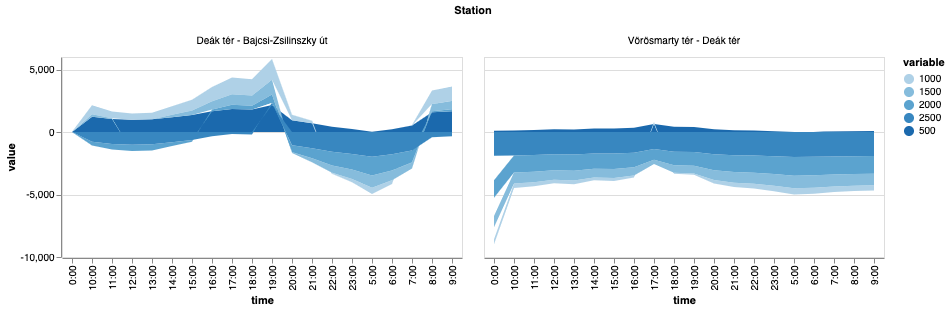

In [67]:
df_t6 = load_input_table("test_6.json")

display(df_t6)

df_t6 = pd.melt(df_t6, id_vars=['time', "Passengers", "Station"], value_vars=["500", "1000","1500","2000","2500"])

display(df_t6)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "area"},
    "encoding": {
        "x": { "field": "time", "type": "nominal"},
        "color": { "field": "variable", "type": "ordinal"},
        "y": { "field": "value", "type": "quantitative"},
        "column": { "field": "Station", "type": "nominal"}
    }
 
}

VegaLite(spec, df_t6)

category       name  priority       sport
0   Freshman   Mister_1         1      Basket
1   Freshman   Mister_3         1      Basket
2   Freshman   Mister_4         1      Basket
3   Freshman   Mister_5         1    Climbing
4   Freshman   Mister_6         1    Climbing
..       ...        ...       ...         ...
63   Seniors  Mister_24         2    Swimming
64   Seniors  Mister_25         2    Swimming
65   Seniors  Mister_22         3  Volleyball
66   Seniors  Mister_23         3  Volleyball
67   Seniors  Mister_24         3  Volleyball

[68 rows x 4 columns]

category       name  priority       sport  highlight
0   Freshman   Mister_1         1      Basket      False
1   Freshman   Mister_3         1      Basket      False
2   Freshman   Mister_4         1      Basket      False
3   Freshman   Mister_5         1    Climbing      False
4   Freshman   Mister_6         1    Climbing      False
..       ...        ...       ...         ...        ...
63   Seniors  Mister_24         2    Swimming      False
64   Seniors  Mister_25         2    Swimming      False
65   Seniors  Mister_22         3  Volleyball      False
66   Seniors  Mister_23         3  Volleyball      False
67   Seniors  Mister_24         3  Volleyball      False

[68 rows x 5 columns]

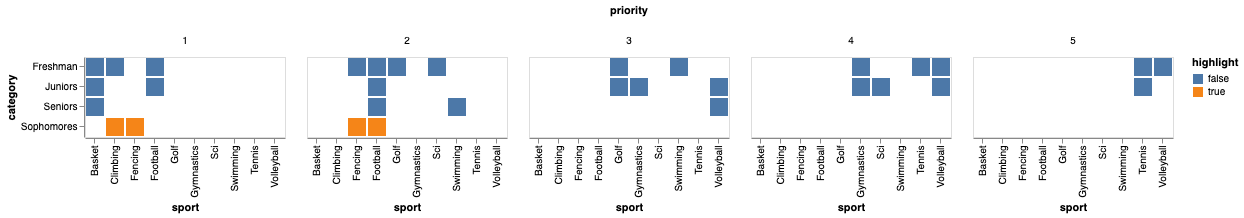

In [68]:
df_t7 = load_input_table("test_7.json")

display(df_t7)

df_t7["highlight"] = df_t7["category"] == "Sophomores"

display(df_t7)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar"},
    "encoding": {
        "x": { "field": "sport", "type": "nominal"},
        "color": { "field": "highlight", "type": "nominal"},
        "y": { "field": "category", "type": "nominal"},
        "column": { "field": "priority", "type": "nominal"}
    }
}

VegaLite(spec, df_t7)

ageFrom  ageTo       id  qt
0        0     10  valore1   5
1       10     15  valore2  12
2       15     30  valore3  74
3       30     40  valore4  12
4       40     99  valore5   8
5       99    120  valore6  15

ageFrom  ageTo       id  qt  range
0        0     10  valore1   5     10
1       10     15  valore2  12      5
2       15     30  valore3  74     15
3       30     40  valore4  12     10
4       40     99  valore5   8     59
5       99    120  valore6  15     21

ageFrom  ageTo       id  qt  range   label
0        0     10  valore1   5     10    0_10
1       10     15  valore2  12      5   10_15
2       15     30  valore3  74     15   15_30
3       30     40  valore4  12     10   30_40
4       40     99  valore5   8     59   40_99
5       99    120  valore6  15     21  99_120

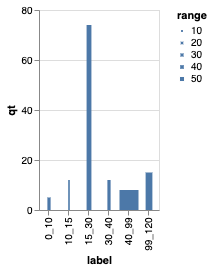

In [69]:
df_t8 = load_input_table("test_8.json")

display(df_t8)

df_t8["range"] = df_t8["ageTo"] - df_t8["ageFrom"]

display(df_t8)

df_t8["label"] = [str(x) + "_" + str(df_t8["ageTo"][i]) for i, x in enumerate(df_t8["ageFrom"])] 

display(df_t8)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"type": "bar"},
    "encoding": {
        "x": { "field": "label", "type": "ordinal"},
        "size": { "field": "range", "type": "quantitative"},
        "y": { "field": "qt", "type": "quantitative"},
    }
}

VegaLite(spec, df_t8)

2010-1  2010-2  2010-3  2010-4  2011-1  2011-2  2011-3  2011-4  2012-1  \
0     813     194     937     719     840     322     326     567     333   
1     242     486     531     556     858     792     637     343     771   
2     258     171     848     979     690     598     651     731     149   
3     903     653     800     465     149     656     958     309     465   
4     339     113     670     561     385     178     458     946     983   
5     311     242     309     196     162     337     701     998     507   
6     338     840     447     294     442     665     316     449     781   
7     706     485     980     487     347     846     121     532     674   
8     573     705     984     525     699     904     723     419     878   
9     494     198     727     148     887     847     350     912     595   

     Group   Venditor  
0  Group_1   Vendor_1  
1  Group_1   Vendor_2  
2  Group_1   Vendor_3  
3  Group_2   Vendor_4  
4  Group_2   Vendor_5  
5  Group_2   Vendor_6  
6  Group_2   Vendor_7  
7  Group_3   Vendor_8  
8  Group_3   Vendor_9  
9  Group_3  Vendor_10

Group   Venditor variable  value
0   Group_1   Vendor_1   2010-1    813
1   Group_1   Vendor_2   2010-1    242
2   Group_1   Vendor_3   2010-1    258
3   Group_2   Vendor_4   2010-1    903
4   Group_2   Vendor_5   2010-1    339
..      ...        ...      ...    ...
85  Group_2   Vendor_6   2012-1    507
86  Group_2   Vendor_7   2012-1    781
87  Group_3   Vendor_8   2012-1    674
88  Group_3   Vendor_9   2012-1    878
89  Group_3  Vendor_10   2012-1    595

[90 rows x 4 columns]

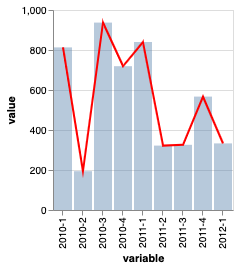

In [70]:
df_t9 = load_input_table("test_9.json")

display(df_t9)

df_t9 = pd.melt(df_t9, id_vars=["Group", "Venditor"], 
                value_vars=["2010-1", "2010-2", "2010-3", "2010-4", "2011-1", 
                            "2011-2", "2011-3", "2011-4", "2012-1"])

display(df_t9)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "transform": [{"filter": "datum.Venditor == \"Vendor_1\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "variable", "type": "ordinal" }
            }
        }, 
        {
            "mark": {"type": "line", "stroke": "red"},
            "transform": [{"filter": "datum.Venditor == \"Vendor_1\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "variable", "type": "ordinal" }
            }
        }
  ]
}

VegaLite(spec, df_t9)

2010-1  2010-2  2010-3  2010-4  2011-1  2011-2  2011-3  2011-4  2012-1  \
0     813     194     937     719     840     322     326     567     333   
1     242     486     531     556     858     792     637     343     771   
2     258     171     848     979     690     598     651     731     149   
3     903     653     800     465     149     656     958     309     465   
4     339     113     670     561     385     178     458     946     983   
5     311     242     309     196     162     337     701     998     507   
6     338     840     447     294     442     665     316     449     781   
7     706     485     980     487     347     846     121     532     674   
8     573     705     984     525     699     904     723     419     878   
9     494     198     727     148     887     847     350     912     595   

     Group   Venditor  
0  Group_1   Vendor_1  
1  Group_1   Vendor_2  
2  Group_1   Vendor_3  
3  Group_2   Vendor_4  
4  Group_2   Vendor_5  
5  Group_2   Vendor_6  
6  Group_2   Vendor_7  
7  Group_3   Vendor_8  
8  Group_3   Vendor_9  
9  Group_3  Vendor_10

Group   Venditor variable  value
0   Group_1   Vendor_1   2010-1    813
1   Group_1   Vendor_2   2010-1    242
2   Group_1   Vendor_3   2010-1    258
3   Group_2   Vendor_4   2010-1    903
4   Group_2   Vendor_5   2010-1    339
..      ...        ...      ...    ...
85  Group_2   Vendor_6   2012-1    507
86  Group_2   Vendor_7   2012-1    781
87  Group_3   Vendor_8   2012-1    674
88  Group_3   Vendor_9   2012-1    878
89  Group_3  Vendor_10   2012-1    595

[90 rows x 4 columns]

Group   Venditor variable  value              label
0   Group_1   Vendor_1   2010-1    813   Group_1_Vendor_1
1   Group_1   Vendor_2   2010-1    242   Group_1_Vendor_2
2   Group_1   Vendor_3   2010-1    258   Group_1_Vendor_3
3   Group_2   Vendor_4   2010-1    903   Group_2_Vendor_4
4   Group_2   Vendor_5   2010-1    339   Group_2_Vendor_5
..      ...        ...      ...    ...                ...
85  Group_2   Vendor_6   2012-1    507   Group_2_Vendor_6
86  Group_2   Vendor_7   2012-1    781   Group_2_Vendor_7
87  Group_3   Vendor_8   2012-1    674   Group_3_Vendor_8
88  Group_3   Vendor_9   2012-1    878   Group_3_Vendor_9
89  Group_3  Vendor_10   2012-1    595  Group_3_Vendor_10

[90 rows x 5 columns]

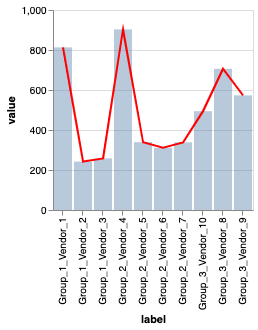

In [71]:
df_t10 = load_input_table("test_10.json")

display(df_t10)

df_t10 = pd.melt(df_t10, id_vars=["Group", "Venditor"], 
                 value_vars=["2010-1", "2010-2", "2010-3", "2010-4", "2011-1", 
                             "2011-2", "2011-3", "2011-4", "2012-1"])

display(df_t10)

df_t10["label"] = df_t10["Group"] + "_" + df_t10["Venditor"]

display(df_t10)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "transform": [{"filter": "datum.variable == \"2010-1\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "label", "type": "ordinal" }
            }
        }, 
        {
            "mark": {"type": "line", "stroke": "red"},
            "transform": [{"filter": "datum.variable == \"2010-1\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "label", "type": "ordinal" }
            }
        }
  ]
}

VegaLite(spec, df_t10)

2010-1  2010-2  2010-3  2010-4  2011-1  2011-2  2011-3  2011-4  2012-1  \
0     813     194     937     719     840     322     326     567     333   

     Group  Venditor  
0  Group_1  Vendor_1

Group  Venditor variable  value
0  Group_1  Vendor_1   2010-1    813
1  Group_1  Vendor_1   2010-2    194
2  Group_1  Vendor_1   2010-3    937
3  Group_1  Vendor_1   2010-4    719
4  Group_1  Vendor_1   2011-1    840
5  Group_1  Vendor_1   2011-2    322
6  Group_1  Vendor_1   2011-3    326
7  Group_1  Vendor_1   2011-4    567
8  Group_1  Vendor_1   2012-1    333

Group  Venditor variable  value  cumsum
0  Group_1  Vendor_1   2010-1    813     813
1  Group_1  Vendor_1   2010-2    194    1007
2  Group_1  Vendor_1   2010-3    937    1944
3  Group_1  Vendor_1   2010-4    719    2663
4  Group_1  Vendor_1   2011-1    840    3503
5  Group_1  Vendor_1   2011-2    322    3825
6  Group_1  Vendor_1   2011-3    326    4151
7  Group_1  Vendor_1   2011-4    567    4718
8  Group_1  Vendor_1   2012-1    333    5051

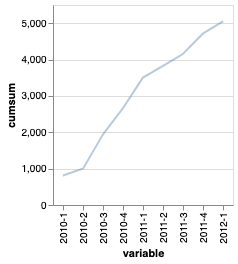

In [72]:
df_t11 = load_input_table("test_11.json")

display(df_t11)

df_t11 = pd.melt(df_t11, id_vars=["Group", "Venditor"], value_vars=["2010-1", "2010-2", "2010-3", "2010-4", "2011-1", "2011-2", "2011-3", "2011-4", "2012-1"])

display(df_t11)

df_t11['cumsum'] = df_t11.groupby("Venditor")['value'].transform(pd.Series.cumsum)

display(df_t11)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "line"},
    "encoding": {
        "y": {"field": "cumsum", "type": "quantitative"},
        "x": { "field": "variable", "type": "ordinal" }
    }
}

VegaLite(spec, df_t11)

CATEGORIA_1  CATEGORIA_2  CATEGORIA_3 Quarter
0           19           26           34      Q1
1           41           48           30      Q2
2           25           38           13      Q3
3           47           35           41      Q4

Quarter     variable  value
0       Q1  CATEGORIA_1     19
1       Q2  CATEGORIA_1     41
2       Q3  CATEGORIA_1     25
3       Q4  CATEGORIA_1     47
4       Q1  CATEGORIA_2     26
..     ...          ...    ...
7       Q4  CATEGORIA_2     35
8       Q1  CATEGORIA_3     34
9       Q2  CATEGORIA_3     30
10      Q3  CATEGORIA_3     13
11      Q4  CATEGORIA_3     41

[12 rows x 3 columns]

Quarter     variable  value
0       Q1  CATEGORIA_1     19
1       Q2  CATEGORIA_1     41
2       Q3  CATEGORIA_1     25
3       Q4  CATEGORIA_1     47
4       Q1  CATEGORIA_2     26
..     ...          ...    ...
11      Q4  CATEGORIA_3     41
0       Q1          NaN     79
1       Q2          NaN    119
2       Q3          NaN     76
3       Q4          NaN    123

[16 rows x 3 columns]

Quarter     variable  value
0       Q1  CATEGORIA_1     19
1       Q2  CATEGORIA_1     41
2       Q3  CATEGORIA_1     25
3       Q4  CATEGORIA_1     47
4       Q1  CATEGORIA_2     26
..     ...          ...    ...
11      Q4  CATEGORIA_3     41
0       Q1          sum     79
1       Q2          sum    119
2       Q3          sum     76
3       Q4          sum    123

[16 rows x 3 columns]

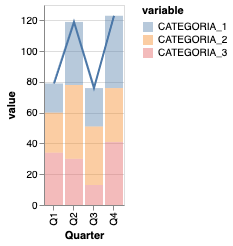

In [73]:
df_t12 = load_input_table("test_12.json")

display(df_t12)

df_t12 = pd.melt(df_t12, id_vars=["Quarter"], value_vars=["CATEGORIA_1", "CATEGORIA_2", "CATEGORIA_3"])

display(df_t12)

df_t12_1 = df_t12.groupby(["Quarter"])['value'].sum().reset_index()
df_t12 = pd.concat([df_t12, df_t12_1], sort=False)

display(df_t12)

df_t12 = df_t12.fillna("sum")

display(df_t12)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "bar"},
            "transform": [{"filter": "datum.variable != \"sum\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Quarter", "type": "ordinal" },
                "color": {"field": "variable", "type": "nominal"}
            }
        }, 
        {
            "mark": {"type": "line"},
            "transform": [{"filter": "datum.variable == \"sum\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Quarter", "type": "ordinal" }
            }
        }
  ]
}

VegaLite(spec, df_t12)

MS Access  MS Excel  SAP  SAP Scripting  \
0          0         0    0              0   
1          0         1    1              0   
2          0         2    2              0   
3          0         3    3              0   
4          0         5    4              0   
5          1         6    4              0   
6          2         7    4              0   
7          2         7    4              1   
8          2         8    4              1   
9          3        11    4              1   

                                        Title  VBA  year  
0      Financial Accounting Assistant Manager    0  2003  
1      Financial Accounting Assistant Manager    0  2004  
2     Management Accounting Assistant Manager    0  2005  
3     Management Accounting Assistant Manager    0  2006  
4  Indirect Controlling and Reporting Analyst    0  2007  
5  Indirect Controlling and Reporting Analyst    1  2008  
6  Indirect Controlling and Reporting Analyst    1  2009  
7  Indirect Controlling and Reporting Analyst    2  2010  
8                  Finance Operations Analyst    3  2011  
9                  Finance Operations Analyst    4  2012

Title  year  variable  value
0       Financial Accounting Assistant Manager  2003  MS Excel      0
1       Financial Accounting Assistant Manager  2004  MS Excel      1
2      Management Accounting Assistant Manager  2005  MS Excel      2
3      Management Accounting Assistant Manager  2006  MS Excel      3
4   Indirect Controlling and Reporting Analyst  2007  MS Excel      5
..                                         ...   ...       ...    ...
45  Indirect Controlling and Reporting Analyst  2008       SAP      4
46  Indirect Controlling and Reporting Analyst  2009       SAP      4
47  Indirect Controlling and Reporting Analyst  2010       SAP      4
48                  Finance Operations Analyst  2011       SAP      4
49                  Finance Operations Analyst  2012       SAP      4

[50 rows x 4 columns]

Title  year  variable  value  \
0       Financial Accounting Assistant Manager  2003  MS Excel      0   
1       Financial Accounting Assistant Manager  2004  MS Excel      1   
2      Management Accounting Assistant Manager  2005  MS Excel      2   
3      Management Accounting Assistant Manager  2006  MS Excel      3   
4   Indirect Controlling and Reporting Analyst  2007  MS Excel      5   
..                                         ...   ...       ...    ...   
45  Indirect Controlling and Reporting Analyst  2008       SAP      4   
46  Indirect Controlling and Reporting Analyst  2009       SAP      4   
47  Indirect Controlling and Reporting Analyst  2010       SAP      4   
48                  Finance Operations Analyst  2011       SAP      4   
49                  Finance Operations Analyst  2012       SAP      4   

                                              label  
0       2003_Financial Accounting Assistant Manager  
1       2004_Financial Accounting Assistant Manager  
2      2005_Management Accounting Assistant Manager  
3      2006_Management Accounting Assistant Manager  
4   2007_Indirect Controlling and Reporting Analyst  
..                                              ...  
45  2008_Indirect Controlling and Reporting Analyst  
46  2009_Indirect Controlling and Reporting Analyst  
47  2010_Indirect Controlling and Reporting Analyst  
48                  2011_Finance Operations Analyst  
49                  2012_Finance Operations Analyst  

[50 rows x 5 columns]

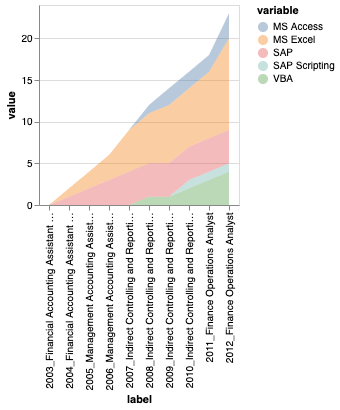

In [74]:
df_t13 = load_input_table("test_13.json")

display(df_t13)

df_t13 = pd.melt(df_t13, id_vars=["Title", "year"], 
                 value_vars=["MS Excel", "MS Access", "VBA", "SAP Scripting", "SAP"])

display(df_t13)

df_t13["label"] = df_t13["year"].astype(str) + "_" + df_t13["Title"]

display(df_t13)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "area"},
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "label", "type": "ordinal" },
        "color": {"field": "variable", "type": "nominal"}
    }
}

VegaLite(spec, df_t13)

hobby                                   title  work
0      0              Preparing monthly forecast    20
1      0        Margin and Product cost analysis    15
2      0            Excel and Access development    10
3     50                         Excel trainings     5
4      8                               Beadworks    50
5      9                                  Sewing     0
6     18                     Fiddling with Excel     0
7     16  Managing Excel Hero group on Linked In     0

title variable  value
0               Preparing monthly forecast     work     20
1         Margin and Product cost analysis     work     15
2             Excel and Access development     work     10
3                          Excel trainings     work      5
4                                Beadworks     work     50
..                                     ...      ...    ...
11                         Excel trainings    hobby     50
12                               Beadworks    hobby      8
13                                  Sewing    hobby      9
14                     Fiddling with Excel    hobby     18
15  Managing Excel Hero group on Linked In    hobby     16

[16 rows x 3 columns]

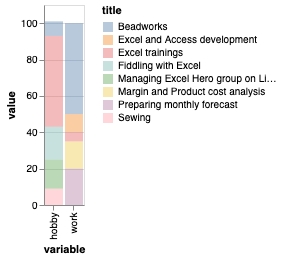

In [75]:
df_t14 = load_input_table("test_14.json")

display(df_t14)

df_t14 = pd.melt(df_t14, id_vars=["title"], value_vars=["work", "hobby"])

display(df_t14)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "bar"},
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "variable", "type": "nominal" },
        "color": {"field": "title", "type": "nominal"}
    }
}

VegaLite(spec, df_t14)

Age  FEMALE 37%  MALE 63%
0   0-18           3         6
1  18-24           8        15
2  25-34          13        22
3  35-44           5        10
4  24-54           5         6
5    55+           3         4

Age    variable  value
0    0-18  FEMALE 37%      3
1   18-24  FEMALE 37%      8
2   25-34  FEMALE 37%     13
3   35-44  FEMALE 37%      5
4   24-54  FEMALE 37%      5
..    ...         ...    ...
7   18-24    MALE 63%     15
8   25-34    MALE 63%     22
9   35-44    MALE 63%     10
10  24-54    MALE 63%      6
11    55+    MALE 63%      4

[12 rows x 3 columns]

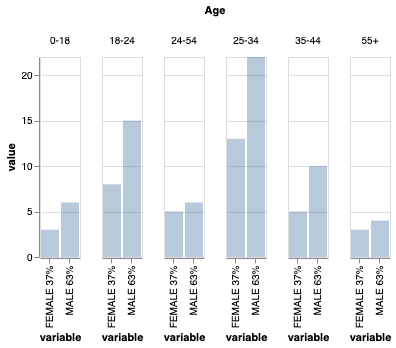

In [76]:
df_t15 = load_input_table("test_15.json")

display(df_t15)

df_t15 = pd.melt(df_t15, id_vars=["Age"], value_vars=["FEMALE 37%", "MALE 63%"])

display(df_t15)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "bar"},
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "variable", "type": "nominal" },
        "column": {"field": "Age", "type": "nominal"}
    }
}

VegaLite(spec, df_t15)

label  total  values
0    lbl_1    100      15
1    lbl_2    100      74
2    lbl_3    100      32
3    lbl_4    100       7
4    lbl_5    100      17
..     ...    ...     ...
16  lbl_17    100      34
17  lbl_18    100      36
18  lbl_19    100      60
19  lbl_20    100      62
20  lbl_21    100      96

[21 rows x 3 columns]

label  total  values  mutate_a
0    lbl_1    100      15        85
1    lbl_2    100      74        26
2    lbl_3    100      32        68
3    lbl_4    100       7        93
4    lbl_5    100      17        83
..     ...    ...     ...       ...
16  lbl_17    100      34        66
17  lbl_18    100      36        64
18  lbl_19    100      60        40
19  lbl_20    100      62        38
20  lbl_21    100      96         4

[21 rows x 4 columns]

label  variable  value
0    lbl_1  mutate_a     85
1    lbl_2  mutate_a     26
2    lbl_3  mutate_a     68
3    lbl_4  mutate_a     93
4    lbl_5  mutate_a     83
..     ...       ...    ...
37  lbl_17    values     34
38  lbl_18    values     36
39  lbl_19    values     60
40  lbl_20    values     62
41  lbl_21    values     96

[42 rows x 3 columns]

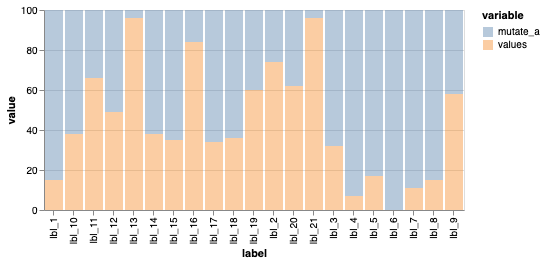

In [77]:
df_t16 = load_input_table("test_16.json")

display(df_t16)

df_t16["mutate_a"] = df_t16["total"] - df_t16["values"]

display(df_t16)

df_t16 = pd.melt(df_t16, id_vars=["label"], value_vars=["mutate_a", "values"])

display(df_t16)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "bar"},
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "label", "type": "nominal" },
        "color": {"field": "variable", "type": "nominal"}
    }
}

VegaLite(spec, df_t16)

APPLE  FACEBOOK       From  GOOGLE  LINKEDIN  MICROSOFT  Total  YAHOO
0    7.6      10.5      YAHOO     3.2      43.0        3.6    100      0
1    5.0      30.5  MICROSOFT     5.2      22.0        0.0    100      0
2    0.0      15.5     GOOGLE     0.0       4.8        0.0    100      0
3    0.0      11.0      APPLE     1.3       1.0        0.0    100      0
4    1.0       2.0   LINKEDIN     0.0       0.0        0.0    100      0
5    0.0       0.0   FACEBOOK     0.0       0.0        0.0    100      0

From  Total variable  value
0       YAHOO    100    APPLE    7.6
1   MICROSOFT    100    APPLE    5.0
2      GOOGLE    100    APPLE    0.0
3       APPLE    100    APPLE    0.0
4    LINKEDIN    100    APPLE    1.0
..        ...    ...      ...    ...
31  MICROSOFT    100    YAHOO    0.0
32     GOOGLE    100    YAHOO    0.0
33      APPLE    100    YAHOO    0.0
34   LINKEDIN    100    YAHOO    0.0
35   FACEBOOK    100    YAHOO    0.0

[36 rows x 4 columns]

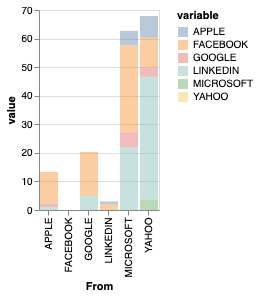

In [78]:
df_t17 = load_input_table("test_17.json")

display(df_t17)

df_t17 = pd.melt(df_t17, id_vars=["From", "Total"], 
                 value_vars=["APPLE", "FACEBOOK", "GOOGLE", "LINKEDIN", "MICROSOFT", "YAHOO"])

display(df_t17)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "bar"},
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "From", "type": "nominal" },
        "color": {"field": "variable", "type": "nominal"}
    }
}

VegaLite(spec, df_t17)

int x1  int x2  int x3  int y1  int y2  int y3  label  y0  y1  y2
0    0.00    0.00    0.00   46.34   42.30   78.00      1  50  46  14
1    0.00   24.21    0.00    9.00   39.57   50.50      2  82  43  37
2   25.93   25.28    0.00   81.93   43.64   50.93      3  54  27  49
3   26.33   26.50   26.51   58.66   44.25   44.53      4  84  86  30
4   27.08   27.78    0.00   11.33   72.86  103.23      5   8   4  58
5   28.53   28.31   28.85   62.48   74.81   71.02      6  48  92  77
6    0.00    0.00    0.00   84.50   13.42   75.45      7  75  37  70
7    0.00    0.00    0.00    0.00    0.00    0.00      8  74  32  58

label variable  value
0       1   int x1   0.00
1       2   int x1   0.00
2       3   int x1  25.93
3       4   int x1  26.33
4       5   int x1  27.08
..    ...      ...    ...
59      4       y2  30.00
60      5       y2  58.00
61      6       y2  77.00
62      7       y2  70.00
63      8       y2  58.00

[64 rows x 3 columns]

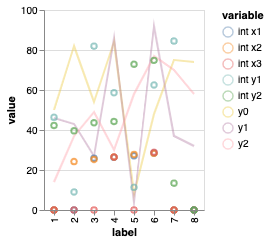

In [79]:
df_t18 = load_input_table("test_18.json")

display(df_t18)

df_t18 = pd.melt(df_t18, id_vars=["label"], 
                 value_vars=["int x1", "int x2", "int x3", "int y1", "int y2", "y0", "y1", "y2"])

display(df_t18)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
        {
            "mark": {"opacity": 0.4, "type": "line"},
            "transform": [{"filter": "datum.variable == \"y0\" || datum.variable == \"y1\" || datum.variable == \"y2\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "label", "type": "ordinal" },
                "color": {"field": "variable", "type": "nominal"}
            }
        }, 
        {
            "mark": {"type": "point"},
            "transform": [{"filter": "datum.variable != \"y0\" && datum.variable != \"y1\" && datum.variable != \"y2\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "label", "type": "ordinal" },
                "color": {"field": "variable", "type": "nominal"}
            }
        }
  ]
}

VegaLite(spec, df_t18)

Product  Profit %  Sales Increase  Sales growth
0    Prod1        42              29             6
1    Prod2        48              18             1
2    Prod3        10               7            -3
3    Prod4        16              11            15
4    Prod5        10               2            -6
..     ...       ...             ...           ...
8    Prod9        30               7            -4
9   Prod10        12              10            15
10  Prod11        55               3            25
11  Prod12        18               8            18
12  Prod13        15              14            19

[13 rows x 4 columns]

Product  Profit %  Sales Increase  Sales growth  mutate_a
0    Prod1        42              29             6        35
1    Prod2        48              18             1        19
2    Prod3        10               7            -3         4
3    Prod4        16              11            15        26
4    Prod5        10               2            -6        -4
..     ...       ...             ...           ...       ...
8    Prod9        30               7            -4         3
9   Prod10        12              10            15        25
10  Prod11        55               3            25        28
11  Prod12        18               8            18        26
12  Prod13        15              14            19        33

[13 rows x 5 columns]

Product  Profit %  Sales growth        variable  value
0    Prod1        42             6  Sales Increase     29
1    Prod2        48             1  Sales Increase     18
2    Prod3        10            -3  Sales Increase      7
3    Prod4        16            15  Sales Increase     11
4    Prod5        10            -6  Sales Increase      2
..     ...       ...           ...             ...    ...
21   Prod9        30            -4        mutate_a      3
22  Prod10        12            15        mutate_a     25
23  Prod11        55            25        mutate_a     28
24  Prod12        18            18        mutate_a     26
25  Prod13        15            19        mutate_a     33

[26 rows x 5 columns]

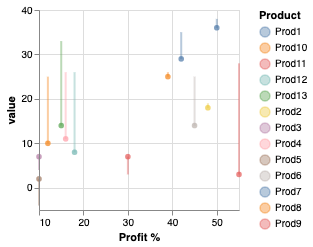

In [80]:
df_t19 = load_input_table("test_19.json")

display(df_t19)

df_t19["mutate_a"] = df_t19["Sales Increase"] + df_t19["Sales growth"]

display(df_t19)

df_t19 = pd.melt(df_t19, id_vars=["Product", "Profit %", "Sales growth"], 
                 value_vars=["Sales Increase", "mutate_a"])

display(df_t19)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "layer": [
       {
            "mark": {"opacity": 0.4, "type": "line"},
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Profit %", "type": "quantitative" },
                "color": {"field": "Product", "type": "nominal"}
            }
       }, 
        {
            "mark": {"type": "circle"},
            "transform": [{"filter": "datum.variable == \"Sales Increase\""}],
            "encoding": {
                "y": {"field": "value", "type": "quantitative"},
                "x": { "field": "Profit %", "type": "quantitative" },
                "color": {"field": "Product", "type": "nominal"}
            }
        }
  ]
}

VegaLite(spec, df_t19)

1960   1961   1962   1963   1964   1965   1966   1967   1968   1969  \
0    74.00  74.20  74.20  74.20  74.20  74.20  74.20  74.26  74.32  74.38   
1    63.89  64.44  64.97  65.50  66.02  66.52  67.02  67.50  67.96  68.42   
2    43.86  44.36  44.91  45.48  46.02  46.47  46.75  46.79  46.55  46.01   
3    45.10  45.62  46.62  48.15  50.15  52.52  55.09  57.64  59.97  61.98   
4    58.03  58.43  58.83  59.21  59.59  59.96  60.32  60.67  61.02  61.36   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
182  41.53  42.20  42.88  43.57  44.28  44.98  45.68  46.38  47.08  47.77   
183  36.78  37.27  37.80  38.38  39.02  39.70  40.42  41.17  41.91  42.65   
184  38.21  38.61  39.01  39.43  39.85  40.29  40.72  41.17  41.61  42.05   
185  46.84  47.52  48.19  48.85  49.51  50.15  50.79  51.43  52.06  52.67   
186  60.36  60.74  61.09  61.45  61.81  62.21  62.64  63.11  63.61  64.14   

             ...             2004   2005   2006   2007   2008   2009   2010  \
0            ...            83.00  83.30  83.50  83.70  83.70  83.90  84.00   
1            ...            79.47  79.64  79.79  79.93  80.06  80.19  80.32   
2            ...            60.41  61.01  61.62  62.23  62.82  63.38  63.91   
3            ...            73.67  73.88  74.10  74.33  74.56  74.79  75.03   
4            ...            71.14  71.38  71.59  71.76  71.90  72.02  72.11   
..           ...              ...    ...    ...    ...    ...    ...    ...   
182          ...            64.30  64.72  65.13  65.53  65.93  66.33  66.71   
183          ...            74.66  75.31  75.87  76.37  76.83  77.28  77.71   
184          ...            65.34  66.17  66.93  67.63  68.24  68.77  69.22   
185          ...            64.72  64.91  65.11  65.34  65.58  65.84  66.12   
186          ...            77.37  77.56  77.62  77.62  77.65  77.73  77.86   

      2011       Country Name                 Region  
0    84.10          Australia  East Asia and Pacific  
1    80.45  Brunei Darussalam  East Asia and Pacific  
2    64.40           Cambodia  East Asia and Pacific  
3    75.26              China  East Asia and Pacific  
4    72.19               Fiji  East Asia and Pacific  
..     ...                ...                    ...  
182  67.08              India             South Asia  
183  78.12           Maldives             South Asia  
184  69.61              Nepal             South Asia  
185  66.41           Pakistan             South Asia  
186  78.05          Sri Lanka             South Asia  

[187 rows x 54 columns]

Country Name                 Region variable  value
0             Australia  East Asia and Pacific     1960  74.00
1     Brunei Darussalam  East Asia and Pacific     1960  63.89
2              Cambodia  East Asia and Pacific     1960  43.86
3                 China  East Asia and Pacific     1960  45.10
4                  Fiji  East Asia and Pacific     1960  58.03
...                 ...                    ...      ...    ...
9719              India             South Asia     2011  67.08
9720           Maldives             South Asia     2011  78.12
9721              Nepal             South Asia     2011  69.61
9722           Pakistan             South Asia     2011  66.41
9723          Sri Lanka             South Asia     2011  78.05

[9724 rows x 4 columns]

Country Name                       Region variable  value
78                Argentina  Latin America and Caribbean     1960  68.10
79                    Aruba  Latin America and Caribbean     1960  67.12
80             Bahamas, The  Latin America and Caribbean     1960  65.62
81                 Barbados  Latin America and Caribbean     1960  66.94
82                   Belize  Latin America and Caribbean     1960  62.01
...                     ...                          ...      ...    ...
9643               Suriname  Latin America and Caribbean     2011  73.89
9644    Trinidad and Tobago  Latin America and Caribbean     2011  73.53
9645                Uruguay  Latin America and Caribbean     2011  80.10
9646          Venezuela, RB  Latin America and Caribbean     2011  77.37
9647  Virgin Islands (U.S.)  Latin America and Caribbean     2011  82.41

[1716 rows x 4 columns]

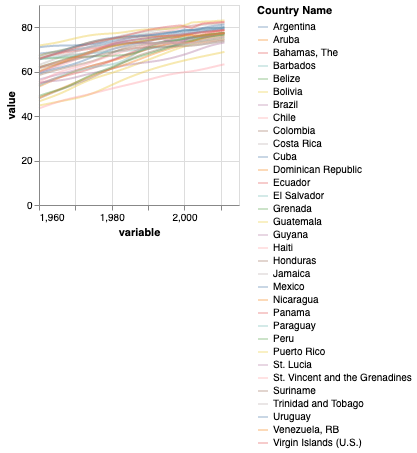

In [81]:
df_t20 = load_input_table("test_20.json")

display(df_t20)

df_t20 = pd.melt(df_t20, id_vars=["Country Name", "Region"], 
                 value_vars=["1960","1961","1962","1963","1964","1965","1966",
                             "1967","1968","1969","1970","1971","1972","1973",
                             "1974","1975","1976","1977","1978","1979","1980",
                             "1981","1982","1983","1984","1985","1986","1987",
                             "1988","1989","1990","1991","1992","1993","1994",
                             "1995","1996","1997","1998","1999","2000","2001",
                             "2002","2003","2004","2005","2006","2007","2008",
                             "2009","2010","2011"])

display(df_t20)

df_t20 = df_t20[df_t20["Region"] == "Latin America and Caribbean"]

display(df_t20)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "line"},
    "encoding": {
        "y": {"field": "value", "type": "quantitative"},
        "x": { "field": "variable", "type": "quantitative" },
        "color": {"field": "Country Name", "type": "nominal"}
    }
}

VegaLite(spec, df_t20)

Country Name      Date         Type
0       Bangladesh    1/5/14  Legislative
1            Egypt   1/14/14   Referendum
2       Costa Rica    2/2/14    President
3       Costa Rica    2/2/14  Legislative
4      El Salvador    2/2/14    President
..             ...       ...          ...
55  American Samoa   11/4/14  Legislative
56            Guam   11/4/14  Legislative
57   United States   11/4/14  Legislative
58       Catalonia   11/9/14   Referendum
59           Tonga  11/25/14  Legislative

[60 rows x 3 columns]

Country Name      Date         Type month day
0       Bangladesh    1/5/14  Legislative     1   5
1            Egypt   1/14/14   Referendum     1  14
2       Costa Rica    2/2/14    President     2   2
3       Costa Rica    2/2/14  Legislative     2   2
4      El Salvador    2/2/14    President     2   2
..             ...       ...          ...   ...  ..
55  American Samoa   11/4/14  Legislative    11   4
56            Guam   11/4/14  Legislative    11   4
57   United States   11/4/14  Legislative    11   4
58       Catalonia   11/9/14   Referendum    11   9
59           Tonga  11/25/14  Legislative    11  25

[60 rows x 5 columns]

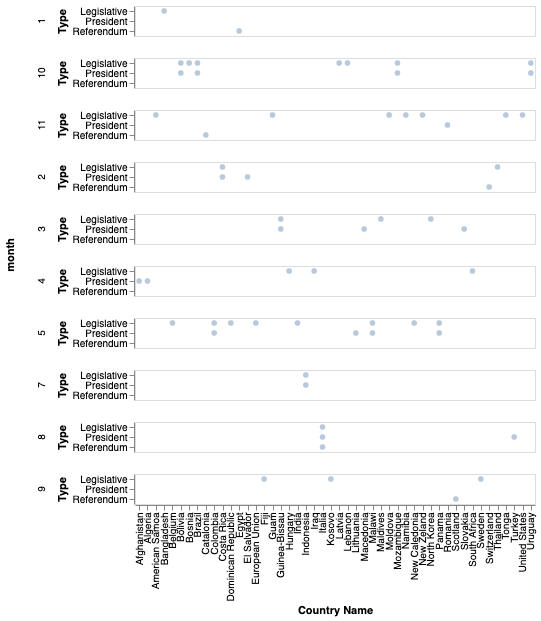

In [82]:
df_t21 = load_input_table("test_21.json")

display(df_t21)

split_col = df_t21["Date"].str.split("/", expand=True)
df_t21["month"] = split_col[0]
df_t21["day"] = split_col[1]

display(df_t21)

spec = {
    "height": 30,
    "width": 400,
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 0.4, "type": "circle"},
    "encoding": {
        "x" : {"field": "Country Name", "type": "nominal"},
        "y": {"field": "Type", "type": "nominal"},
        "row": {"field": "month", "type": "nominal"}
    }
}

VegaLite(spec, df_t21)

Q1  Q2  Q3  Q4        product
0   10   5   5   3  Product1_2011
1    2   5   7   5  Product2_2011
2    7  10   9   3  Product3_2011
3    1   8   2   3  Product4_2011
4    6   1   7   1  Product5_2011
..  ..  ..  ..  ..            ...
13   7   7   6   8  Product2_2013
14   9   4   8   9  Product3_2013
15   2   5   9   5  Product4_2013
16   4   2   5   1  Product5_2013
17   4   6  10   8  Product6_2013

[18 rows x 5 columns]

Q1  Q2  Q3  Q4        product      prod  year
0   10   5   5   3  Product1_2011  Product1  2011
1    2   5   7   5  Product2_2011  Product2  2011
2    7  10   9   3  Product3_2011  Product3  2011
3    1   8   2   3  Product4_2011  Product4  2011
4    6   1   7   1  Product5_2011  Product5  2011
..  ..  ..  ..  ..            ...       ...   ...
13   7   7   6   8  Product2_2013  Product2  2013
14   9   4   8   9  Product3_2013  Product3  2013
15   2   5   9   5  Product4_2013  Product4  2013
16   4   2   5   1  Product5_2013  Product5  2013
17   4   6  10   8  Product6_2013  Product6  2013

[18 rows x 7 columns]

prod  year variable  value
0   Product1  2011       Q1     10
1   Product2  2011       Q1      2
2   Product3  2011       Q1      7
3   Product4  2011       Q1      1
4   Product5  2011       Q1      6
..       ...   ...      ...    ...
67  Product2  2013       Q4      8
68  Product3  2013       Q4      9
69  Product4  2013       Q4      5
70  Product5  2013       Q4      1
71  Product6  2013       Q4      8

[72 rows x 4 columns]

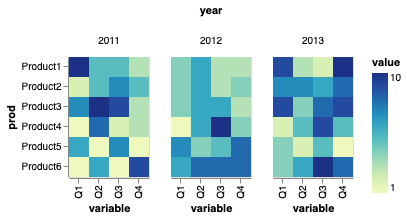

In [83]:
df_t22 = load_input_table("test_22.json")

display(df_t22)

split_col = df_t22["product"].str.split("_", expand=True)
df_t22["prod"] = split_col[0]
df_t22["year"] = split_col[1]

display(df_t22)

df_t22 = pd.melt(df_t22, id_vars=["prod", "year"], value_vars=["Q1", "Q2", "Q3", "Q4"])

display(df_t22)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 1, "type": "rect"},
    "encoding": {
        "color": { "field": "value", "type": "quantitative" },
        "x" : {"field": "variable", "type": "nominal"},
        "y": {"field": "prod", "type": "nominal"},
        "column": {"field": "year", "type": "nominal"}
    }
}

VegaLite(spec, df_t22)

Q1  Q2  Q3  Q4        product  year
0   10   5   5   3  Product1_2011  2011
1    2   5   7   5  Product2_2011  2011
2    7  10   9   3  Product3_2011  2011
3    1   8   2   3  Product4_2011  2011
4    6   1   7   1  Product5_2011  2011
..  ..  ..  ..  ..            ...   ...
13   7   7   6   8  Product2_2013  2013
14   9   4   8   9  Product3_2013  2013
15   2   5   9   5  Product4_2013  2013
16   4   2   5   1  Product5_2013  2013
17   4   6  10   8  Product6_2013  2013

[18 rows x 6 columns]

year        product variable  value
0   2011  Product1_2011       Q1     10
1   2011  Product2_2011       Q1      2
2   2011  Product3_2011       Q1      7
3   2011  Product4_2011       Q1      1
4   2011  Product5_2011       Q1      6
..   ...            ...      ...    ...
67  2013  Product2_2013       Q4      8
68  2013  Product3_2013       Q4      9
69  2013  Product4_2013       Q4      5
70  2013  Product5_2013       Q4      1
71  2013  Product6_2013       Q4      8

[72 rows x 4 columns]

year variable  value
0   2011       Q1     27
1   2011       Q2     35
2   2011       Q3     31
3   2011       Q4     24
4   2012       Q1     26
..   ...      ...    ...
7   2012       Q4     30
8   2013       Q1     35
9   2013       Q2     27
10  2013       Q3     40
11  2013       Q4     41

[12 rows x 3 columns]

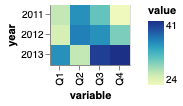

In [84]:
df_t23 = load_input_table("test_23.json")

display(df_t23)

df_t23 = pd.melt(df_t23, id_vars=["year", "product"], value_vars=["Q1", "Q2", "Q3", "Q4"])

display(df_t23)

df_t23 = df_t23.groupby(['year', "variable"])["value"].sum().reset_index()

display(df_t23)

spec = {
    "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
    "mark": {"opacity": 1, "type": "rect"},
    "encoding": {
        "color": { "field": "value", "type": "quantitative" },
        "x" : {"field": "variable", "type": "nominal"},
        "y": {"field": "year", "type": "nominal"}
    }
}

VegaLite(spec, df_t23)